In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#한글설정
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

import warnings
warnings.filterwarnings(action='ignore')

# 1. 승강기 부품(레일, 로프 등) 결함모드와 소음 및 승차감에 대한 인과관계 정량화

In [2]:
df=pd.read_excel('고장(200612월-200812월)-20090616.xls',sheet_name='고장')
df

,접수번호,처리구분,고장층,접수내용,추가내용,고장부위1,고장부위2,고장원인,처리결과
0,20061231247,고장접수,05,정지 - 층간정지,5~6층간 정지,제어반 CP,기타,데이타이상,조정
1,20061231234,고장접수,09,정지 - 정지,101동 5호기,제어반 CP,LANTERN PCB,원인불명,확인 및 점검
2,20061231206,고장접수,04,운행이상 - 도어 동작 이상,NaN,CAR DOOR,CAR DOOR 판넬,파손뒤틀림,조정
3,20061231198,고장접수,00,소음 - 카 소음발생,NaN,승강로 & PIT & CWT,기타,이물질,제거
4,20061231192,고장접수,00,소음 - 카 소음발생,NaN,승강로 & PIT & CWT,기타,이물질,제거
...,...,...,...,...,...,...,...,...,...
30866,20081231207,고장접수,00,진동 - 진동발생,진동 - 2동 5호기 좌우진동 상승시 소음 /2동기기 진동도 같이 정검요청,ON CAR,CAR OILEROIL,조정불량,조정
30867,20081226246,고장접수,02,정지 - 정지,정지 - 2층 정지/출발시 통화요!,IN CAR & OPB,기타,정상가동,도착시 정상
30868,20081228156,고장접수,00,소음 - 카 소음발생,소음 - 101동 902호 주민 /운행되지 않아도 소음심함,CAR DOOR,SAFETY SHOE,부품불량,교체
30869,20081231118,고장접수,B1,정지 - 정지,정지 - 12-2호기/B1F정지 /5.9.12동 오류->사무소 방문요청,CAR DOOR,MULT BEAM,이물질,제거


## 1.1. 컬럼별 분석

### 1.1.1. 고장원인

In [3]:
df['고장원인'].value_counts()

조정불량        7767
접촉불량        4146
부품불량        2857
이물질         2802
정상가동        1697
오동작         1316
데이타이상       1174
마찰,걸림,간섭    1043
파손뒤틀림       1007
사용자부주의       928
이탈 탈선        833
끼임           767
원인불명         509
안전스위치동작      410
트립           337
기타           334
단선           327
스위치오조작       312
변형           285
오신고          275
풀림           249
오일부족         195
소손           191
누수침수         182
정전           145
노이즈          136
합선단락         113
로프장력불량        82
마모            70
점등불량          53
파단            52
수명연한초과        50
자체수리          36
전력불안정         19
절단            18
설치누락          17
과부하           17
누전            15
분실 도난         12
오결선           11
과전압            9
접지불량           9
과전류            7
누유             6
낙뇌             6
융착             6
과열             5
기계실 온도상승       4
방전             3
화재             2
지진             2
도색불량,산화        1
공진             1
Name: 고장원인, dtype: int64

#### 고장원인 빈도수 막대그래프

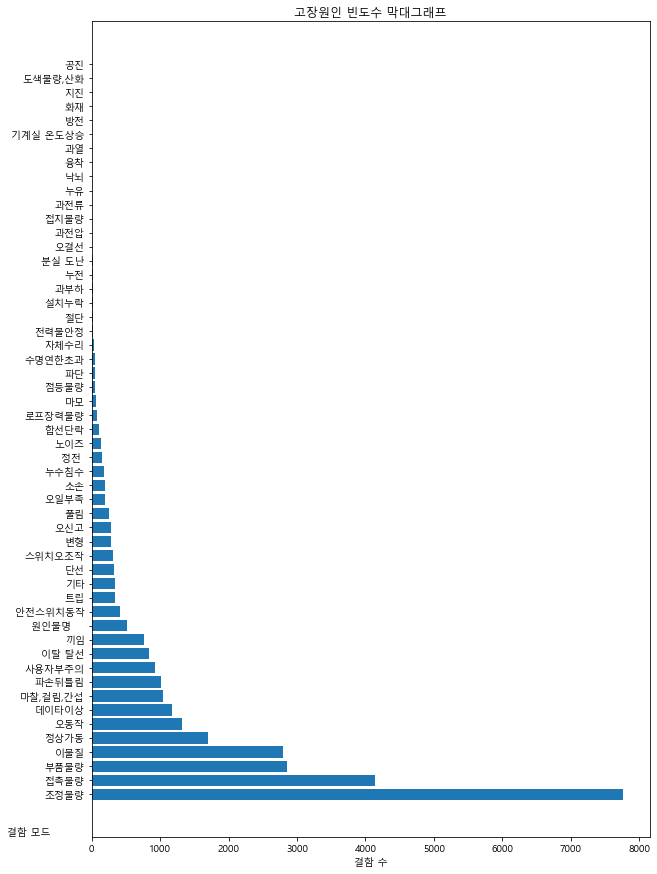

In [4]:
y = np.arange(len(df['고장원인'].value_counts()))

ErrorPart = df['고장원인'].value_counts().index
values = df['고장원인'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('고장원인 빈도수 막대그래프')
plt.xlabel('결함 수', loc='center')
plt.ylabel('결함 모드', loc='bottom', rotation=0)
plt.show()

#### 고장원인 빈도수 TOP5 파이차트

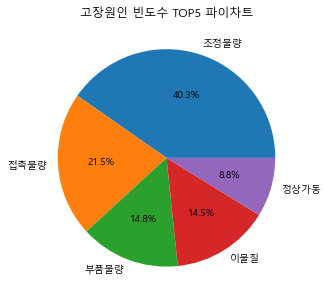

In [5]:
ratio = df['고장원인'].value_counts()[:5].values
labels = df['고장원인'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('고장원인 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 1.1.2. 고장층

In [6]:
df['고장층'].value_counts()

00    14434
01     4660
B1     1718
02     1083
03      979
      ...  
58        1
42        1
61        1
49        1
65        1
Name: 고장층, Length: 79, dtype: int64

#### 고장층 빈도수 막대그래프

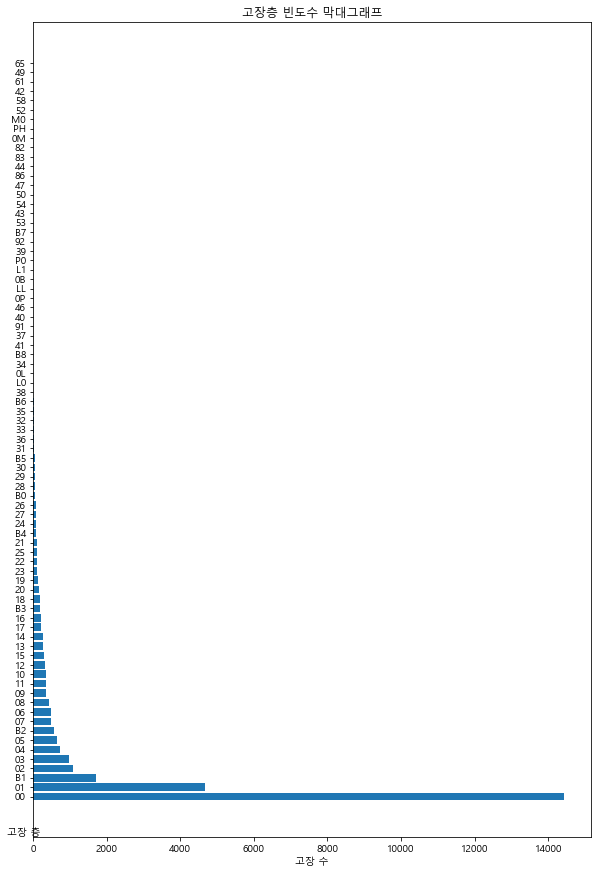

In [7]:
y = np.arange(len(df['고장층'].value_counts()))

ErrorPart = df['고장층'].value_counts().index
values = df['고장층'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('고장층 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장 층', loc='bottom', rotation=0)
plt.show()

#### 고장층 빈도수 TOP5 파이차트

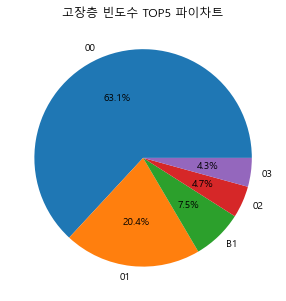

In [8]:
ratio = df['고장층'].value_counts()[:5].values
labels = df['고장층'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('고장층 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 1.1.3. 처리결과

In [9]:
df['처리결과'].value_counts()

조정              12628
교체               4420
제거               2700
RESET            1776
도착시 정상           1708
수입 및 청소          1673
복귀               1586
확인 및 점검          1480
기타               1409
재결선               496
보강작업              259
취부                244
보충                215
자체처리              102
단자조임               38
수거                 31
납땜 및 용접            22
Name: 처리결과, dtype: int64

#### 처리결과 빈도수 막대그래프

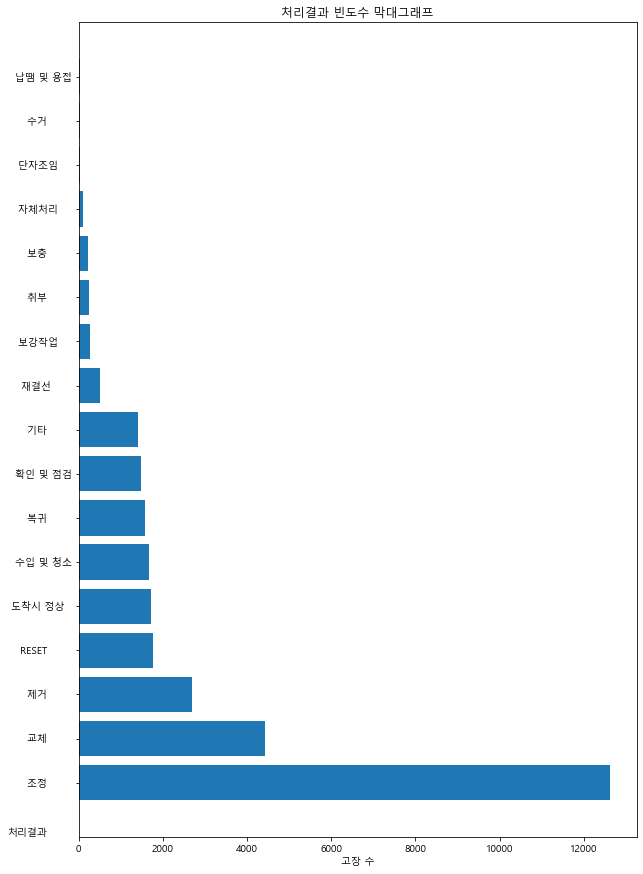

In [10]:
y = np.arange(len(df['처리결과'].value_counts()))

ErrorPart = df['처리결과'].value_counts().index
values = df['처리결과'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('처리결과 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('처리결과', loc='bottom', rotation=0)
plt.show()

#### 처리결과 빈도수 TOP5 파이차트

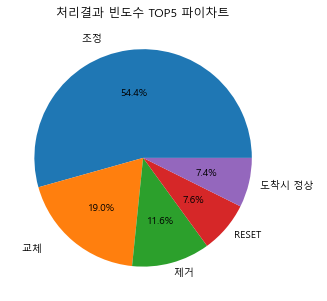

In [11]:
ratio = df['처리결과'].value_counts()[:5].values
labels = df['처리결과'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('처리결과 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 1.1.4. 고장부위1

#### 고장부위1 빈도수 막대그래프

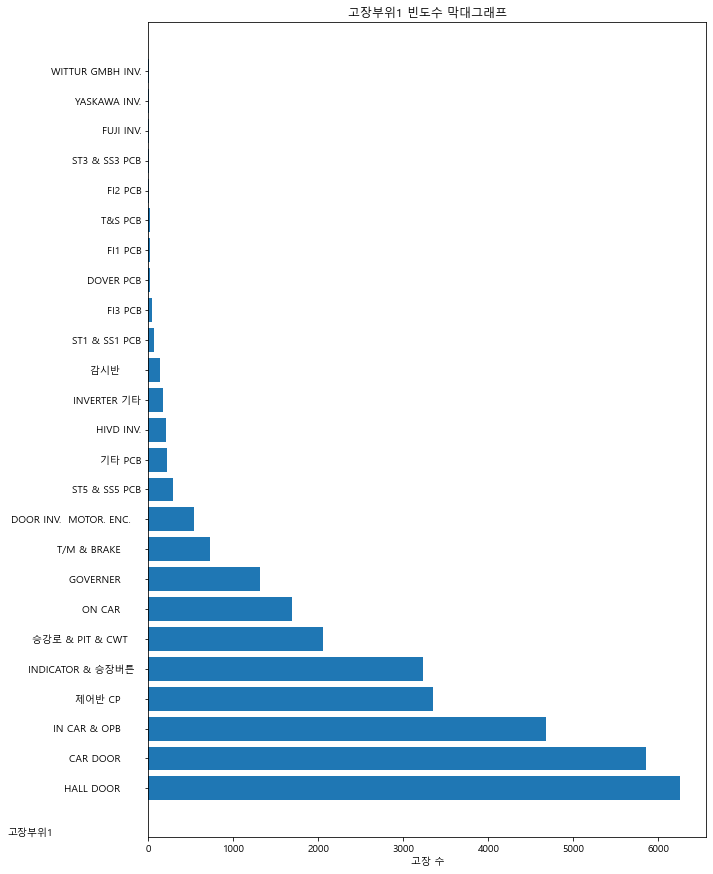

In [12]:
y = np.arange(len(df['고장부위1'].value_counts()))

ErrorPart = df['고장부위1'].value_counts().index
values = df['고장부위1'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('고장부위1 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장부위1', loc='bottom', rotation=0)
plt.show()

#### 고장부위1 빈도수 TOP5 파이차트

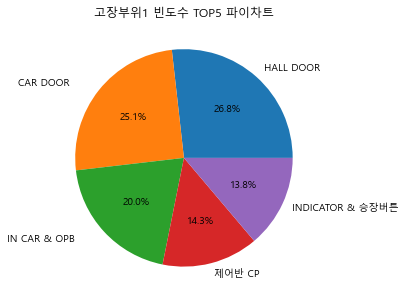

In [13]:
ratio = df['고장부위1'].value_counts()[:5].values
labels = df['고장부위1'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('고장부위1 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 1.1.5. 고장부위2

#### 고장부위2 빈도수 막대그래프

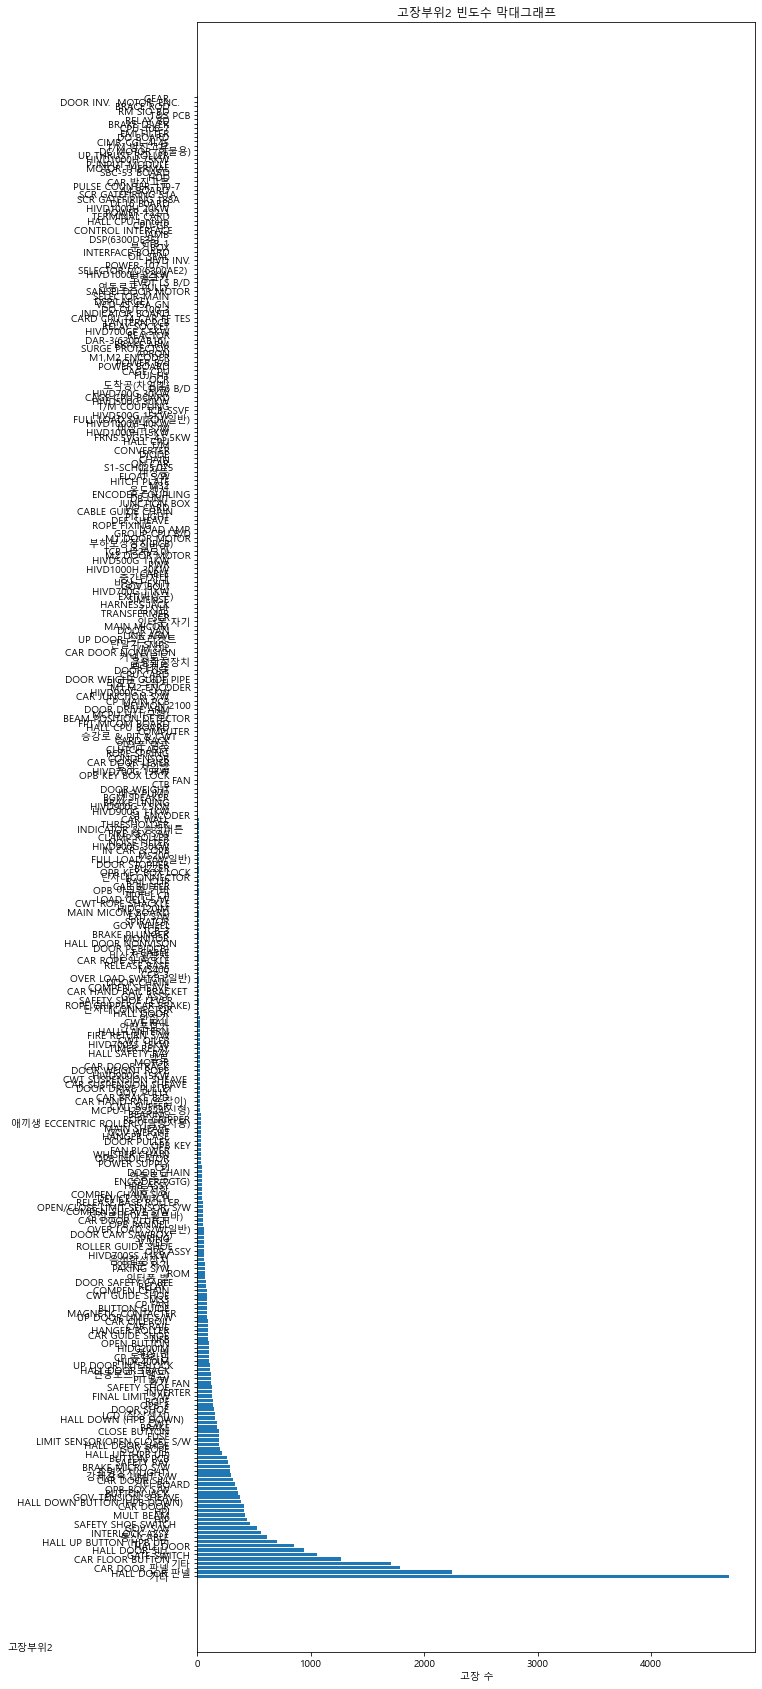

In [14]:
y = np.arange(len(df['고장부위2'].value_counts()))

ErrorPart = df['고장부위2'].value_counts().index
values = df['고장부위2'].value_counts().values

plt.figure(figsize=(10, 30))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('고장부위2 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장부위2', loc='bottom', rotation=0)
plt.show()

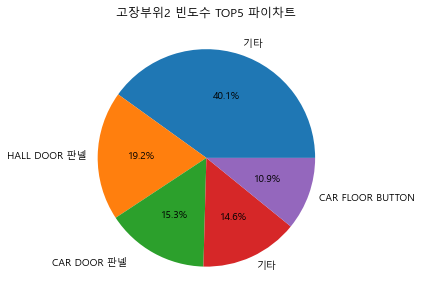

In [15]:
ratio = df['고장부위2'].value_counts()[:5].values
labels = df['고장부위2'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('고장부위2 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### 고장부위2 빈도수 TOP5 파이차트

## 1.2. 접수내용별 구분

### 1.2.1. 소음

In [16]:
df_noise=df[df['접수내용'].str.contains('소음')]
df_noise

,접수번호,처리구분,고장층,접수내용,추가내용,고장부위1,고장부위2,고장원인,처리결과
3,20061231198,고장접수,00,소음 - 카 소음발생,NaN,승강로 & PIT & CWT,기타,이물질,제거
4,20061231192,고장접수,00,소음 - 카 소음발생,NaN,승강로 & PIT & CWT,기타,이물질,제거
6,20061231187,고장접수,00,소음 - 카 소음발생,NaN,제어반 CP,기타,오동작,복귀
7,20061231169,고장접수,00,소음 - 카 소음발생,NaN,GOVERNER,GOV. TENSION SHEAVE,조정불량,조정
10,20061231110,고장접수,00,소음 - 카 소음발생,방제실에 들러서 설명요청!!,IN CAR & OPB,IN CAR & OPB,"마찰,걸림,간섭",NaN
...,...,...,...,...,...,...,...,...,...
30845,20081231296,고장접수,00,소음 - 카 소음발생,소음 - 882-2호기 운행중소음심함,승강로 & PIT & CWT,CWT OILER,끼임,조정
30851,20081231327,고장접수,00,소음 - 카 소음발생,소음 - 131동3호기,HALL DOOR,HALL DOOR,이물질,제거
30859,20081231349,고장접수,00,소음 - 카 소음발생,소음 -,승강로 & PIT & CWT,CAR RAIL,오일부족,보충
30868,20081228156,고장접수,00,소음 - 카 소음발생,소음 - 101동 902호 주민 /운행되지 않아도 소음심함,CAR DOOR,SAFETY SHOE,부품불량,교체


#### 소음 관련 고장원인 빈도수 막대그래프

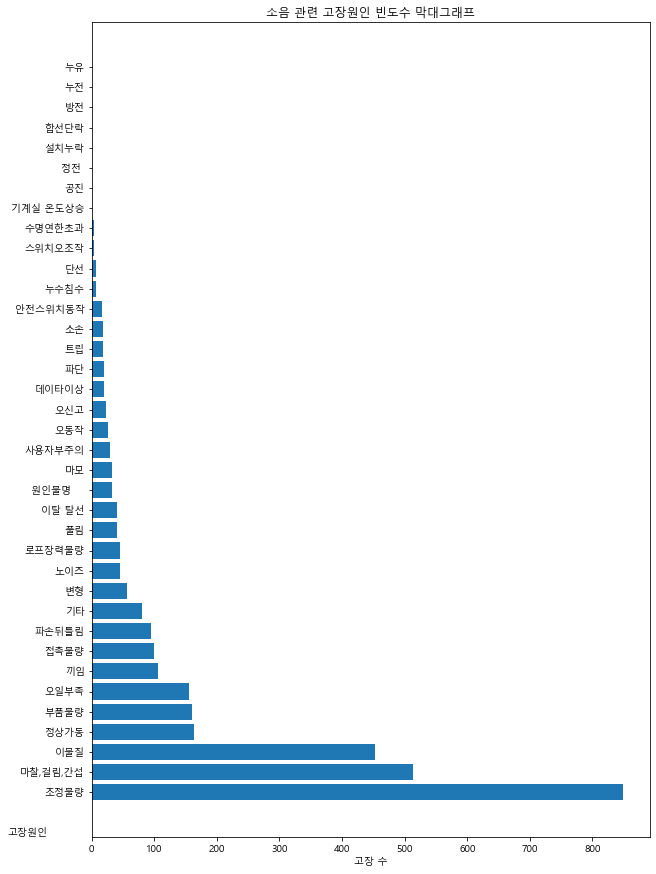

In [17]:
y = np.arange(len(df_noise['고장원인'].value_counts()))

ErrorPart = df_noise['고장원인'].value_counts().index
values = df_noise['고장원인'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('소음 관련 고장원인 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장원인', loc='bottom', rotation=0)
plt.show()

#### 소음 관련 고장원인 빈도수 TOP5 파이차트

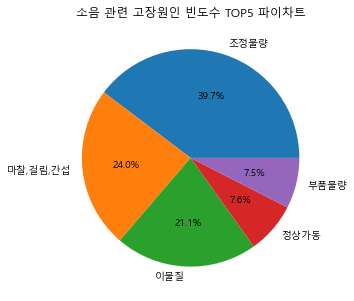

In [18]:
ratio = df_noise['고장원인'].value_counts()[:5].values
labels = df_noise['고장원인'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('소음 관련 고장원인 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### 소음 관련 고장층 빈도수 막대그래프

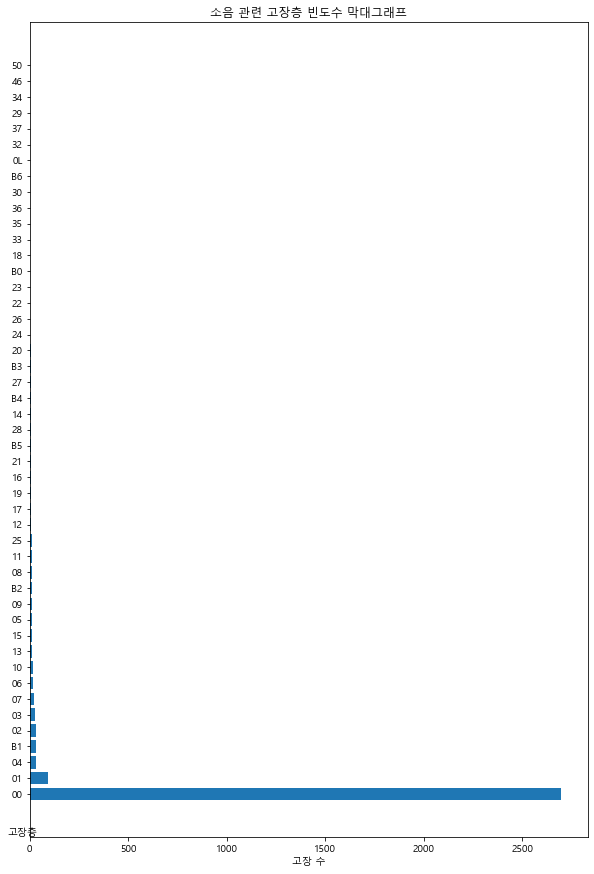

In [19]:
y = np.arange(len(df_noise['고장층'].value_counts()))

ErrorPart = df_noise['고장층'].value_counts().index
values = df_noise['고장층'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('소음 관련 고장층 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장층', loc='bottom', rotation=0)
plt.show()

#### 소음 관련 고장층 빈도수 TOP5 파이차트

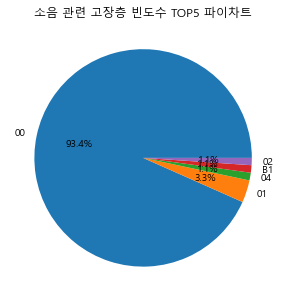

In [20]:
ratio = df_noise['고장층'].value_counts()[:5].values
labels = df_noise['고장층'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('소음 관련 고장층 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### 소음 관련 처리결과 빈도수 막대그래프

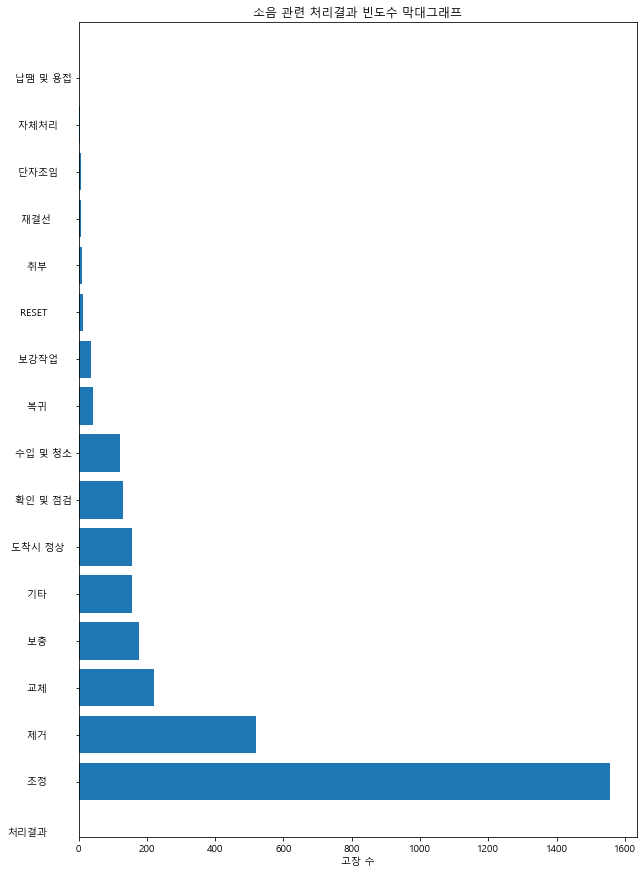

In [21]:
y = np.arange(len(df_noise['처리결과'].value_counts()))

ErrorPart = df_noise['처리결과'].value_counts().index
values = df_noise['처리결과'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('소음 관련 처리결과 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('처리결과', loc='bottom', rotation=0)
plt.show()

#### 소음 관련 처리결과 빈도수 TOP5 파이차트

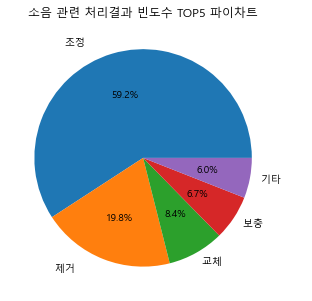

In [22]:
ratio = df_noise['처리결과'].value_counts()[:5].values
labels = df_noise['처리결과'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('소음 관련 처리결과 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### 소음 관련 고장부위1 빈도수 막대그래프

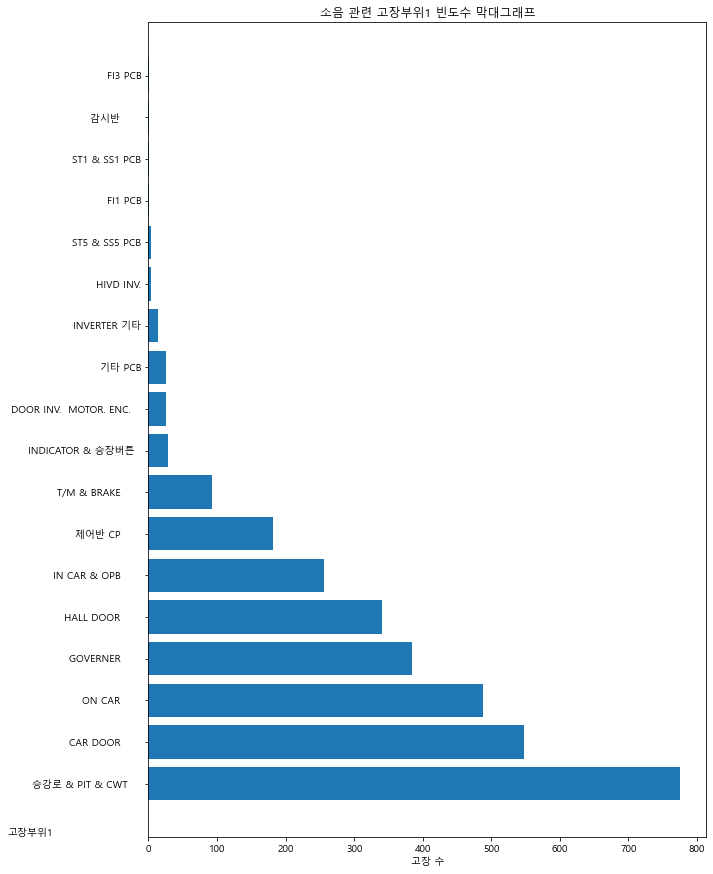

In [23]:
y = np.arange(len(df_noise['고장부위1'].value_counts()))

ErrorPart = df_noise['고장부위1'].value_counts().index
values = df_noise['고장부위1'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('소음 관련 고장부위1 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장부위1', loc='bottom', rotation=0)
plt.show()

#### 소음 관련 고장부위1 빈도수 TOP5 파이차트

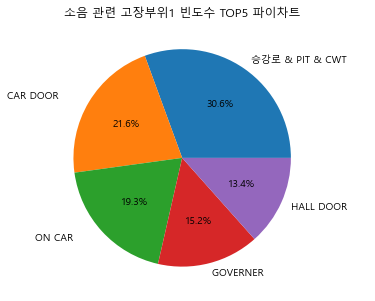

In [24]:
ratio = df_noise['고장부위1'].value_counts()[:5].values
labels = df_noise['고장부위1'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('소음 관련 고장부위1 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### 소음 관련 고장부위2 빈도수 막대그래프

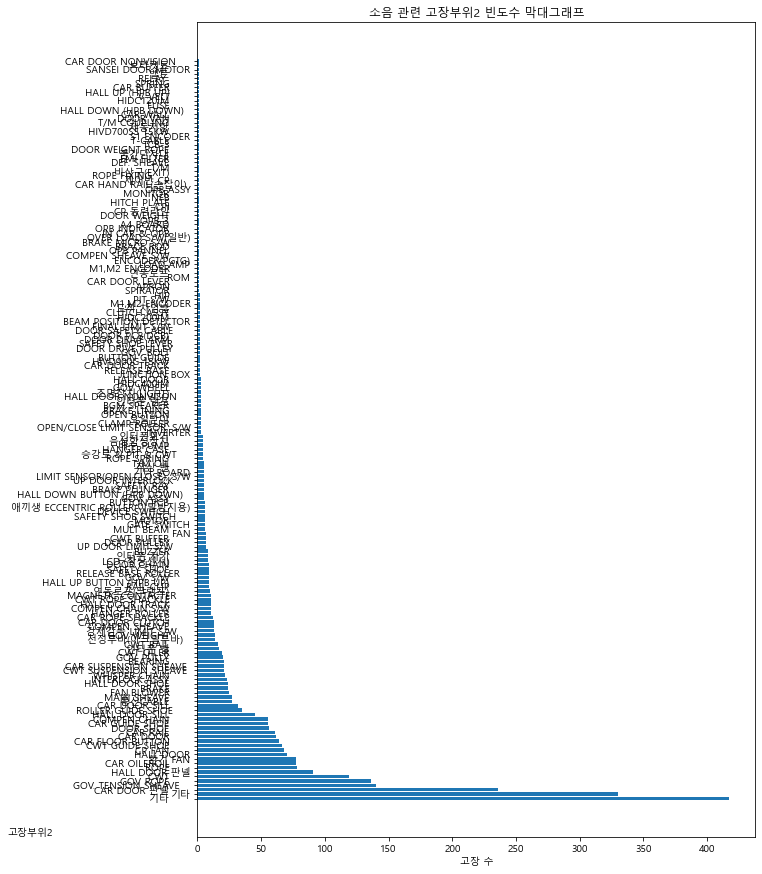

In [25]:
y = np.arange(len(df_noise['고장부위2'].value_counts()))

ErrorPart = df_noise['고장부위2'].value_counts().index
values = df_noise['고장부위2'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('소음 관련 고장부위2 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장부위2', loc='bottom', rotation=0)
plt.show()

#### 소음 관련 고장부위2 빈도수 TOP5 파이차트

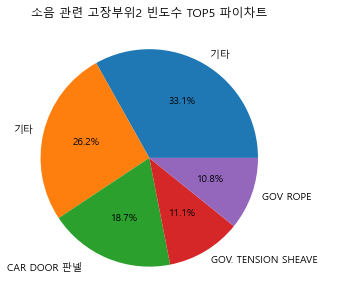

In [26]:
ratio = df_noise['고장부위2'].value_counts()[:5].values
labels = df_noise['고장부위2'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('소음 관련 고장부위2 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 1.2.2. 진동

In [27]:
df_vibration=df[df['접수내용'].str.contains('진동')]
df_vibration

,접수번호,처리구분,고장층,접수내용,추가내용,고장부위1,고장부위2,고장원인,처리결과
38,20061230118,고장접수,00,진동 - 출발시 진동발생,출발 착상시 진동심함,IN CAR & OPB,CAR FLOOR BUTTON,조정불량,조정
42,20061230054,고장접수,00,진동 - 진동발생,2동2호기,IN CAR & OPB,CAR FLOOR BUTTON,조정불량,조정
179,20061226115,고장접수,01,진동 - 진동발생,장례식동,승강로 & PIT & CWT,강제감속 LIMIT S/W,조정불량,조정
255,20061222068,고장접수,00,진동 - 진동발생,주행중 떨림,GOVERNER,GOV. ASSY,정상가동,확인 및 점검
291,20061221038,고장접수,00,진동 - 진동발생,201동 1호기,IN CAR & OPB,CAR FLOOR BUTTON,조정불량,교체
...,...,...,...,...,...,...,...,...,...
30594,20081227123,고장접수,00,진동 - 진동발생,진동 - 103-2/내려갈때 진동,승강로 & PIT & CWT,CAR RAIL,오일부족,보충
30620,20081227235,고장접수,00,진동 - 진동발생,"진동 - 102-1호기 /진동,소음",GOVERNER,GOV. TENSION SHEAVE,"마찰,걸림,간섭",조정
30791,20081230342,고장접수,B1,진동 - 진동발생,진동 - 지하1층 착상시 쿵/카내부 버튼중 한개 안됨/도어 느리게닫힘,제어반 CP,통신CABLE,원인불명,조정
30837,20081231205,고장접수,00,진동 - 진동발생,진동 - 226-1/보양재제거안되어 도어 개폐시소음심함,CAR DOOR,CAR DOOR,이물질,제거


#### 진동 관련 고장원인 빈도수 막대그래프

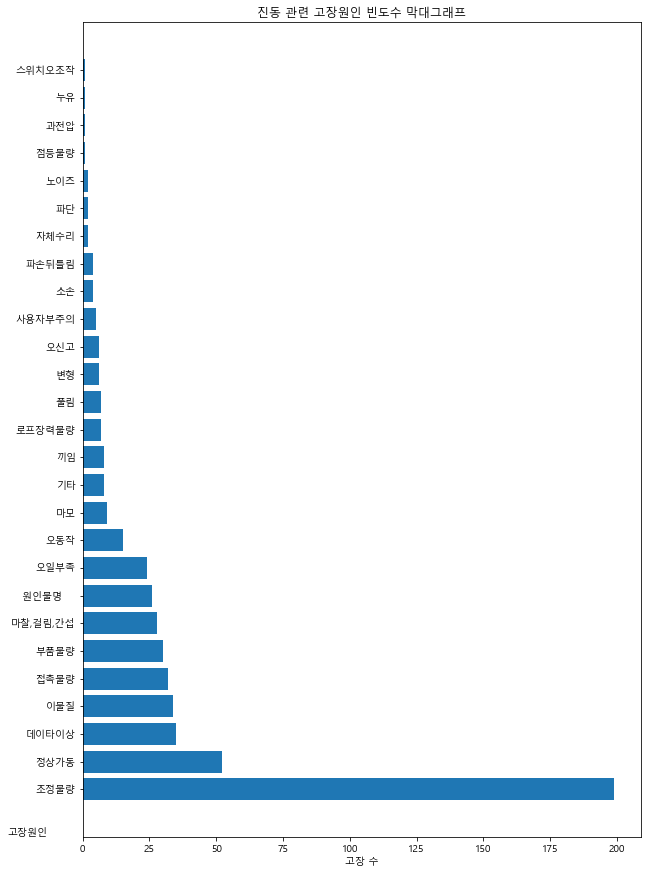

In [28]:
y = np.arange(len(df_vibration['고장원인'].value_counts()))

ErrorPart = df_vibration['고장원인'].value_counts().index
values = df_vibration['고장원인'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('진동 관련 고장원인 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장원인', loc='bottom', rotation=0)
plt.show()

#### 진동 관련 고장원인 빈도수 TOP5 파이차트

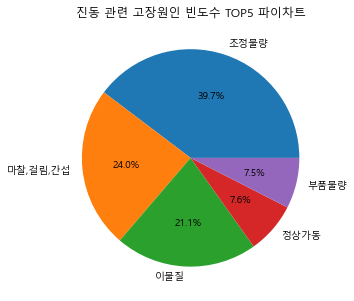

In [29]:
ratio = df_noise['고장원인'].value_counts()[:5].values
labels = df_noise['고장원인'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('진동 관련 고장원인 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### 진동 관련 고장층 빈도수 막대그래프

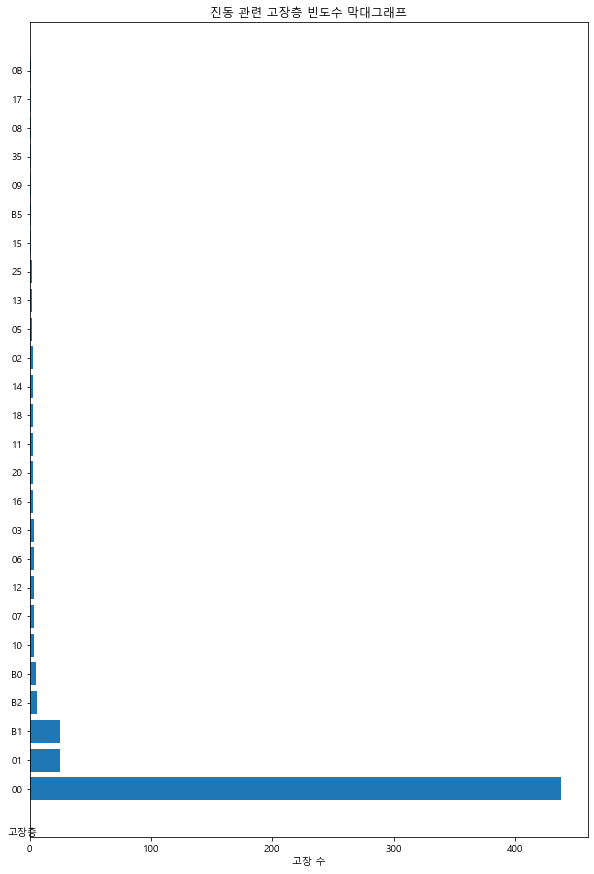

In [30]:
y = np.arange(len(df_vibration['고장층'].value_counts()))

ErrorPart = df_vibration['고장층'].value_counts().index
values = df_vibration['고장층'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('진동 관련 고장층 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장층', loc='bottom', rotation=0)
plt.show()

#### 진동 관련 고장층 빈도수 TOP5 파이차트

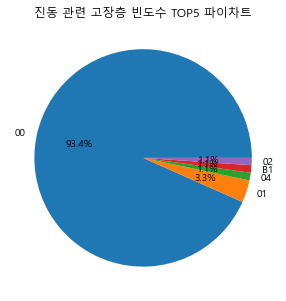

In [31]:
ratio = df_noise['고장층'].value_counts()[:5].values
labels = df_noise['고장층'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('진동 관련 고장층 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### 진동 관련 처리결과 빈도수 막대그래프

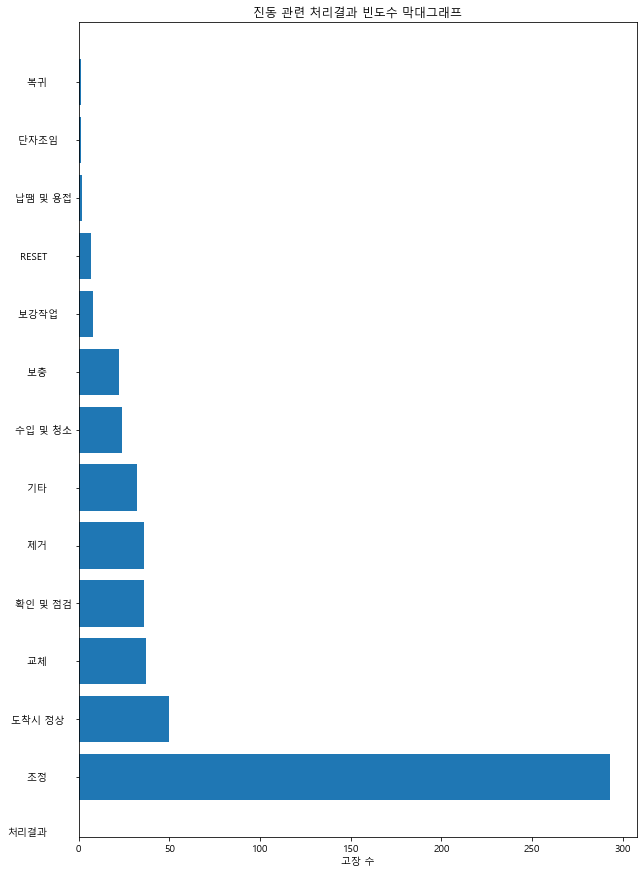

In [32]:
y = np.arange(len(df_vibration['처리결과'].value_counts()))

ErrorPart = df_vibration['처리결과'].value_counts().index
values = df_vibration['처리결과'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('진동 관련 처리결과 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('처리결과', loc='bottom', rotation=0)
plt.show()

#### 진동 관련 처리결과 빈도수 TOP5 파이차트

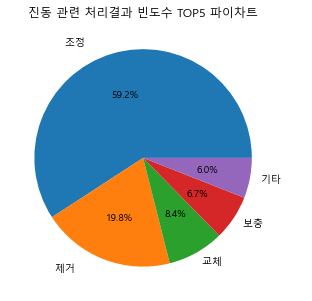

In [33]:
ratio = df_noise['처리결과'].value_counts()[:5].values
labels = df_noise['처리결과'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('진동 관련 처리결과 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### 진동 관련 고장부위1 빈도수 막대그래프

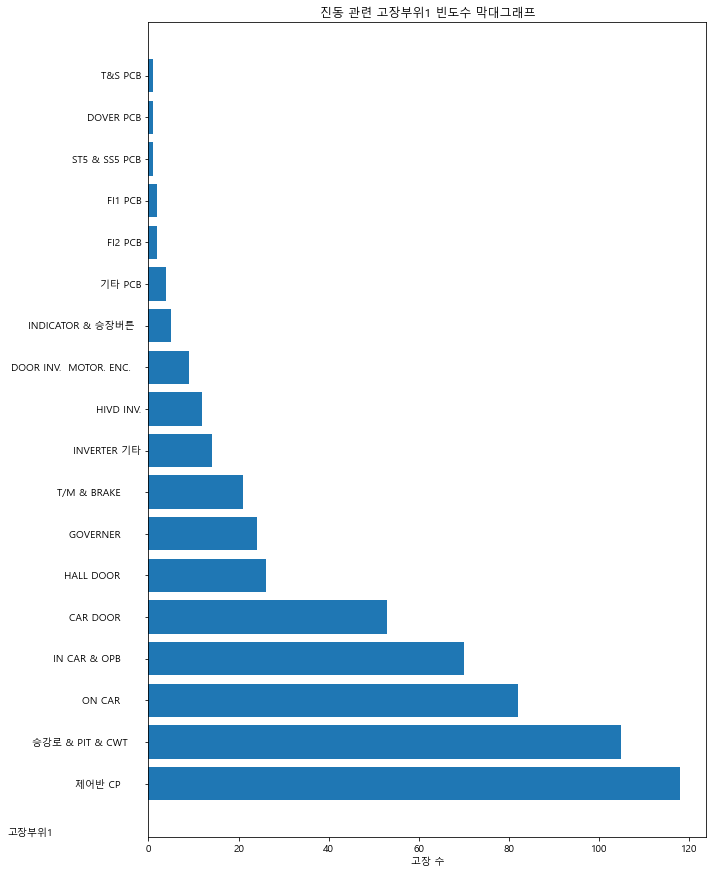

In [34]:
y = np.arange(len(df_vibration['고장부위1'].value_counts()))

ErrorPart = df_vibration['고장부위1'].value_counts().index
values = df_vibration['고장부위1'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('진동 관련 고장부위1 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장부위1', loc='bottom', rotation=0)
plt.show()

#### 진동 관련 고장부위1 빈도수 TOP5 파이차트

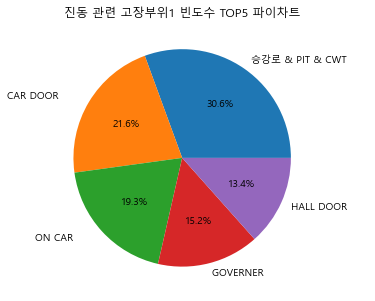

In [35]:
ratio = df_noise['고장부위1'].value_counts()[:5].values
labels = df_noise['고장부위1'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('진동 관련 고장부위1 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

#### 진동 관련 고장부위2 빈도수 막대그래프

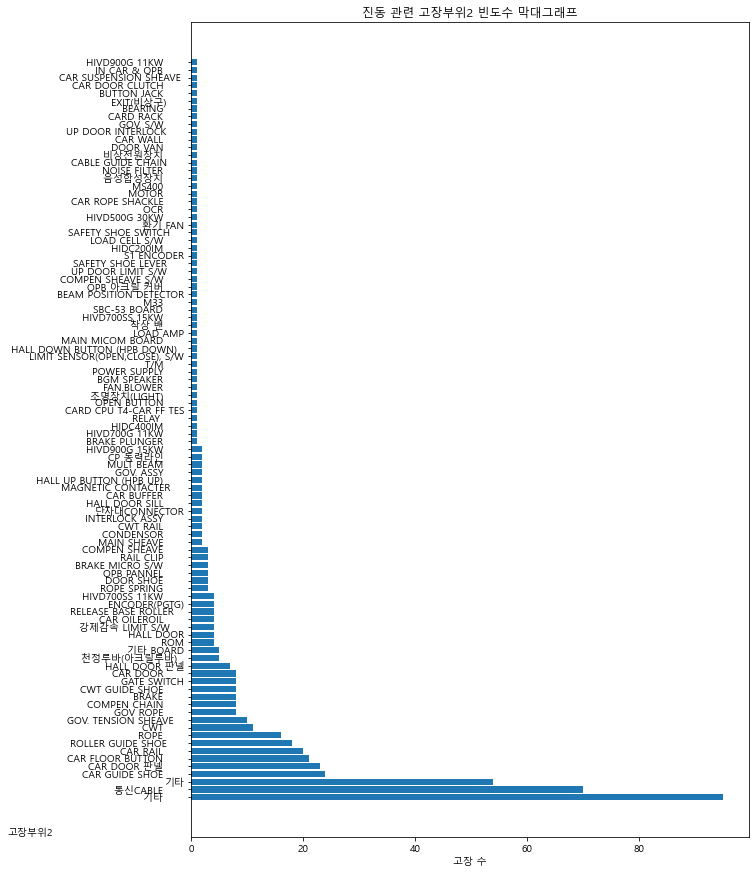

In [36]:
y = np.arange(len(df_vibration['고장부위2'].value_counts()))

ErrorPart = df_vibration['고장부위2'].value_counts().index
values = df_vibration['고장부위2'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.title('진동 관련 고장부위2 빈도수 막대그래프')
plt.xlabel('고장 수', loc='center')
plt.ylabel('고장부위2', loc='bottom', rotation=0)
plt.show()

#### 진동 관련 고장부위2 빈도수 TOP5 파이차트

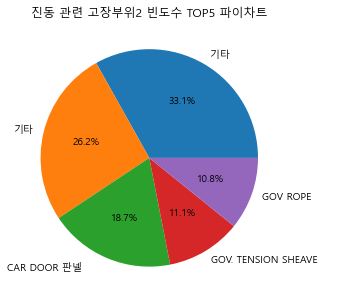

In [37]:
ratio = df_noise['고장부위2'].value_counts()[:5].values
labels = df_noise['고장부위2'].value_counts()[:5].index

plt.figure(figsize=(5, 5))

plt.title('진동 관련 고장부위2 빈도수 TOP5 파이차트')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

## 1.3. 고장원인별 구분

In [38]:
df

,접수번호,처리구분,고장층,접수내용,추가내용,고장부위1,고장부위2,고장원인,처리결과
0,20061231247,고장접수,05,정지 - 층간정지,5~6층간 정지,제어반 CP,기타,데이타이상,조정
1,20061231234,고장접수,09,정지 - 정지,101동 5호기,제어반 CP,LANTERN PCB,원인불명,확인 및 점검
2,20061231206,고장접수,04,운행이상 - 도어 동작 이상,NaN,CAR DOOR,CAR DOOR 판넬,파손뒤틀림,조정
3,20061231198,고장접수,00,소음 - 카 소음발생,NaN,승강로 & PIT & CWT,기타,이물질,제거
4,20061231192,고장접수,00,소음 - 카 소음발생,NaN,승강로 & PIT & CWT,기타,이물질,제거
...,...,...,...,...,...,...,...,...,...
30866,20081231207,고장접수,00,진동 - 진동발생,진동 - 2동 5호기 좌우진동 상승시 소음 /2동기기 진동도 같이 정검요청,ON CAR,CAR OILEROIL,조정불량,조정
30867,20081226246,고장접수,02,정지 - 정지,정지 - 2층 정지/출발시 통화요!,IN CAR & OPB,기타,정상가동,도착시 정상
30868,20081228156,고장접수,00,소음 - 카 소음발생,소음 - 101동 902호 주민 /운행되지 않아도 소음심함,CAR DOOR,SAFETY SHOE,부품불량,교체
30869,20081231118,고장접수,B1,정지 - 정지,정지 - 12-2호기/B1F정지 /5.9.12동 오류->사무소 방문요청,CAR DOOR,MULT BEAM,이물질,제거


### 고장원인 TOP5 파악

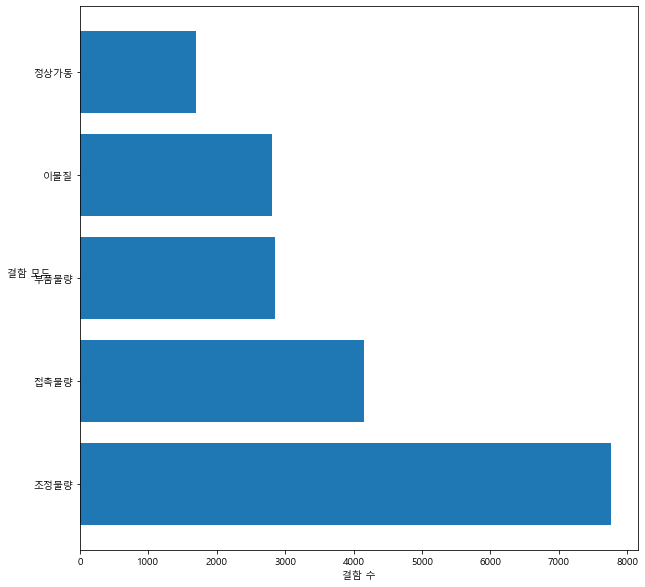

In [39]:
y = np.arange(len(df['고장원인'].value_counts()[:5]))

ErrorPart = df['고장원인'].value_counts()[:5].index
values = df['고장원인'].value_counts()[:5].values

plt.figure(figsize=(10, 10))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.xlabel('결함 수')
plt.ylabel('결함 모드', rotation=0)
plt.show()

In [40]:
df_jj=df[df['고장원인'].str.contains('조정불량', na=False)]
df_jc=df[df['고장원인'].str.contains('접촉불량', na=False)]
df_bp=df[df['고장원인'].str.contains('부품불량', na=False)]
df_e=df[df['고장원인'].str.contains('이물질', na=False)]
df_jg=df[df['고장원인'].str.contains('정상가동', na=False)]

### 1.3.1. 고장원인_조정불량 고장부위1 TOP5

In [41]:
df_jj

,접수번호,처리구분,고장층,접수내용,추가내용,고장부위1,고장부위2,고장원인,처리결과
7,20061231169,고장접수,00,소음 - 카 소음발생,NaN,GOVERNER,GOV. TENSION SHEAVE,조정불량,조정
8,20061231164,고장접수,00,정지 - 정지,NaN,ON CAR,기타,조정불량,조정
11,20061231100,고장접수,01,정지 - 정지,2호기,GOVERNER,GOV. S/W,조정불량,조정
13,20061231074,고장접수,00,소음 - 카 소음발생,NaN,제어반 CP,기타,조정불량,조정
17,20061231016,고장접수,00,운행이상 - 도어 동작 이상,A동-문이 닫힐때 전반적으로 천천히 닫혔다 다시 열림,CAR DOOR,"LIMIT SENSOR(OPEN,CLOSE), S/W",조정불량,조정
...,...,...,...,...,...,...,...,...,...
30822,20081231148,고장접수,00,소음 - 세대내 소음발생,소음 - 207-502호(011-1707-9796:고창민님),HALL DOOR,HALL DOOR,조정불량,조정
30829,20081231393,고장접수,00,소음 - 카 소음발생,소음 - 103-1,DOOR INV. MOTOR. ENC.,기타,조정불량,조정
30865,20081228047,고장접수,00,정지 - 정지,정지 - 101동 2호기 B2층 홀버튼불안들어옴/,INDICATOR & 승장버튼,HALL UP (HPB UP),조정불량,수입 및 청소
30866,20081231207,고장접수,00,진동 - 진동발생,진동 - 2동 5호기 좌우진동 상승시 소음 /2동기기 진동도 같이 정검요청,ON CAR,CAR OILEROIL,조정불량,조정


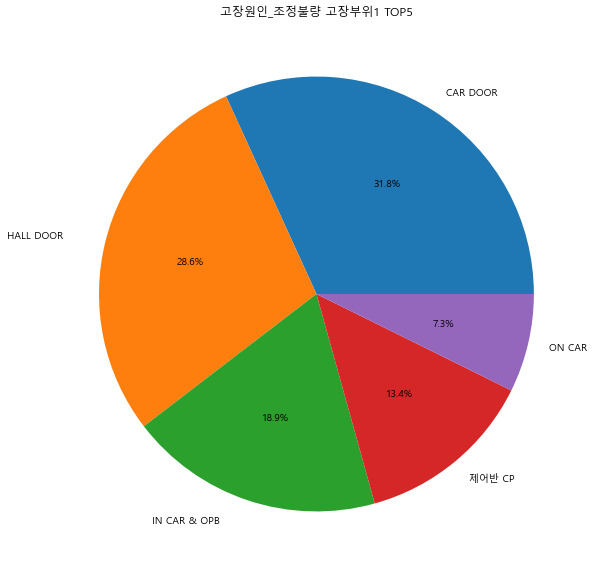

In [42]:
ratio = df_jj['고장부위1'].value_counts()[:5].values
labels = df_jj['고장부위1'].value_counts()[:5].index

plt.figure(figsize=(10, 10))

plt.title('고장원인_조정불량 고장부위1 TOP5')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

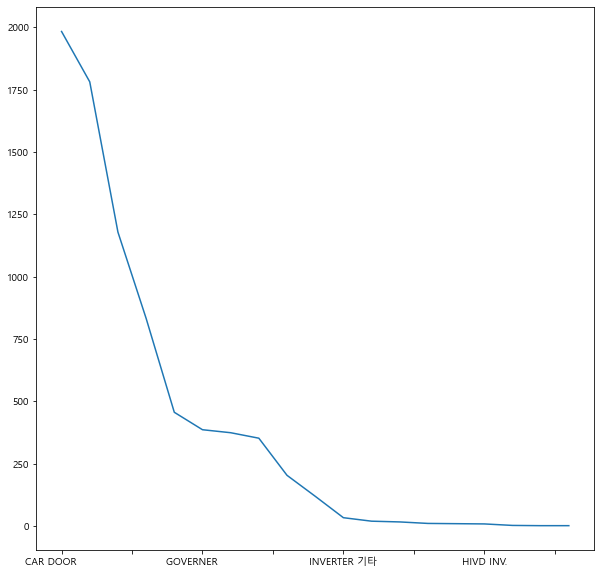

In [43]:
df_jj['고장부위1'].value_counts().plot(figsize=(10,10))
plt.show()

### 1.3.2. 고장원인_접촉불량 고장부위1 TOP5

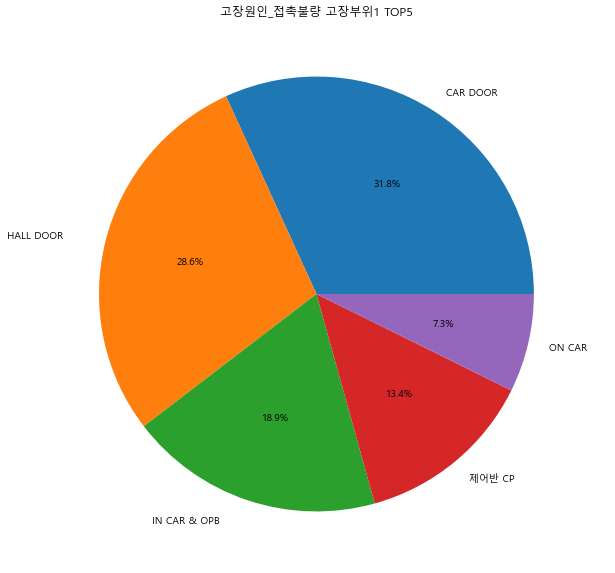

In [44]:
ratio = df_jj['고장부위1'].value_counts()[:5].values
labels = df_jj['고장부위1'].value_counts()[:5].index

plt.figure(figsize=(10, 10))

plt.title('고장원인_접촉불량 고장부위1 TOP5')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

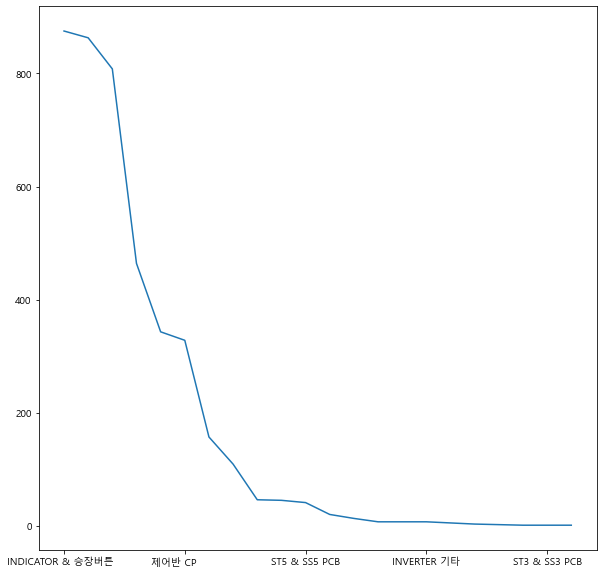

In [45]:
df_jc['고장부위1'].value_counts().plot(figsize=(10,10))
plt.show()

### 1.3.3. 고장원인_부품불량 고장부위1 TOP5

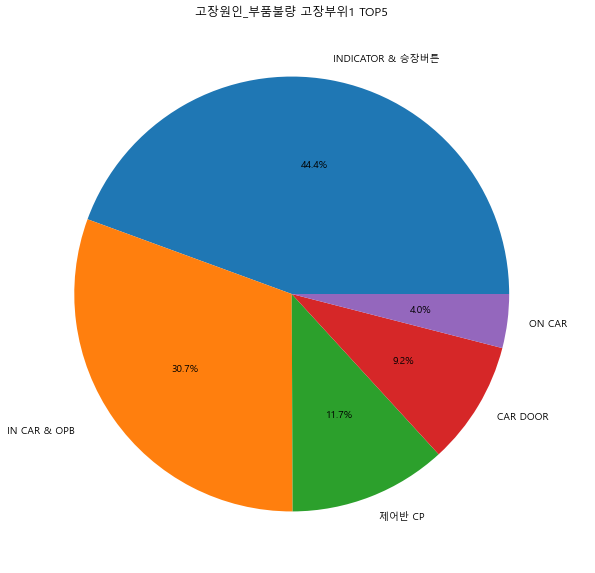

In [46]:
ratio = df_bp['고장부위1'].value_counts()[:5].values
labels = df_bp['고장부위1'].value_counts()[:5].index

plt.figure(figsize=(10, 10))

plt.title('고장원인_부품불량 고장부위1 TOP5')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

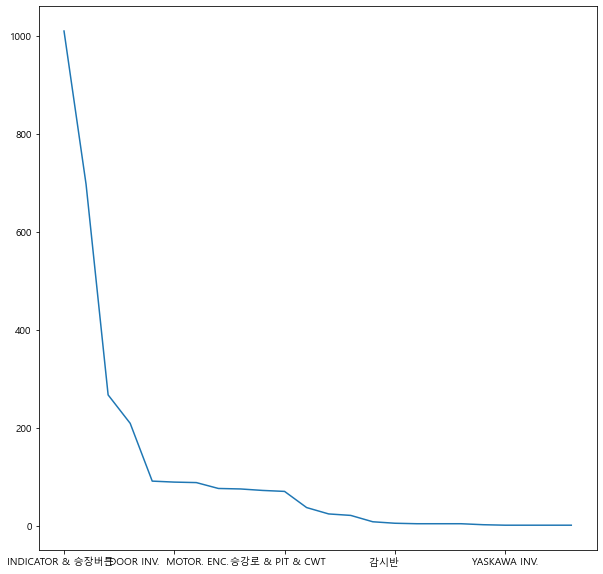

In [47]:
df_bp['고장부위1'].value_counts().plot(figsize=(10,10))
plt.show()

### 1.3.4. 고장원인_이물질 고장부위1 TOP5

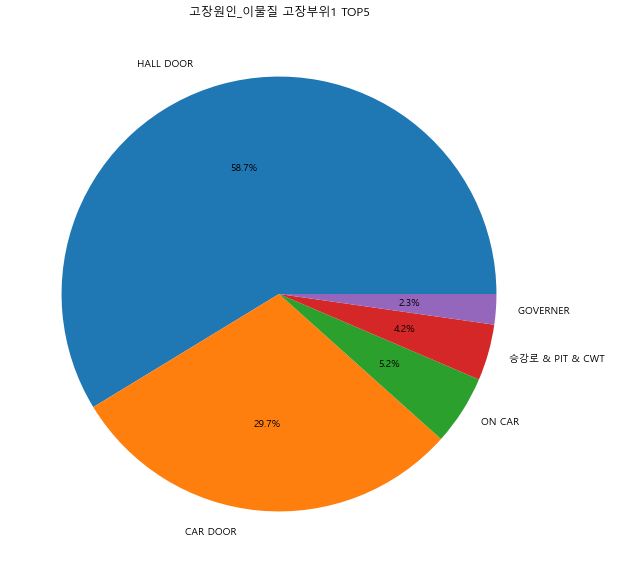

In [48]:
ratio = df_e['고장부위1'].value_counts()[:5].values
labels = df_e['고장부위1'].value_counts()[:5].index

plt.figure(figsize=(10, 10))

plt.title('고장원인_이물질 고장부위1 TOP5')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

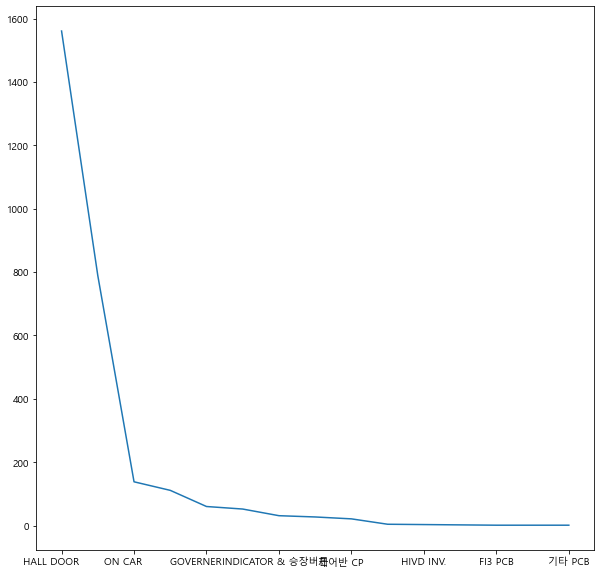

In [49]:
df_e['고장부위1'].value_counts().plot(figsize=(10,10))
plt.show()

### 1.3.5. 고장원인_정상가동 고장부위1 TOP5

- 정상가동인데 왜 고장으로 접수되었는지 확인해보자

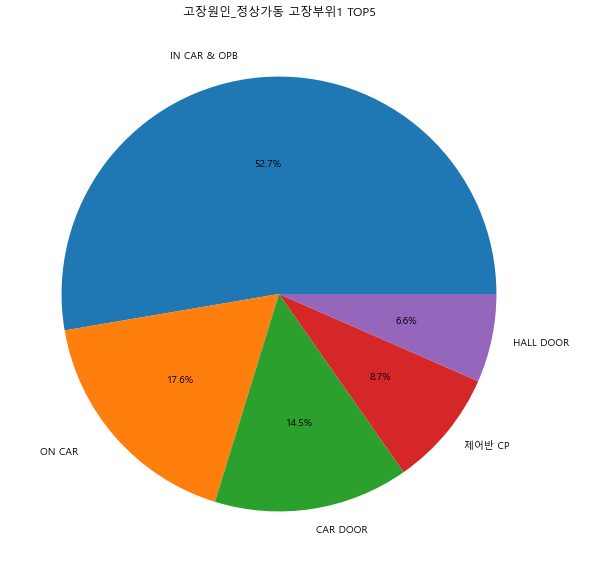

In [50]:
ratio = df_jg['고장부위1'].value_counts()[:5].values
labels = df_jg['고장부위1'].value_counts()[:5].index

plt.figure(figsize=(10, 10))

plt.title('고장원인_정상가동 고장부위1 TOP5')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

<AxesSubplot:>

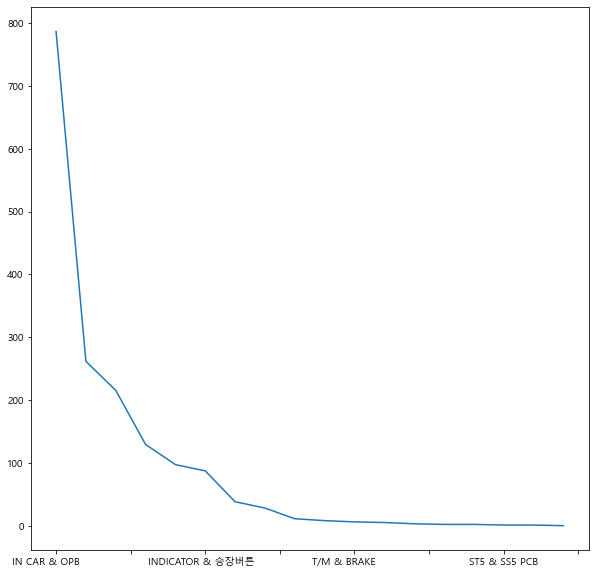

In [51]:
df_jg['고장부위1'].value_counts().plot(figsize=(10,10))

#### 1.3.5.1. 정상가동 분석

정상인데 고장으로 느낀 원인이 뭔지 알아보자! 소음/진동 구분

In [52]:
conditions = [
    (df_jg['접수내용'].str.contains('소음')),
    (df_jg['접수내용'].str.contains('진동')),
    (~df_jg['접수내용'].str.contains('소음')) & (~df_jg['접수내용'].str.contains('진동'))
]

vals = ['소음', '진동', '그 외']

df_jg['접수내용 구분'] = np.select(conditions, vals)
df_jg

,접수번호,처리구분,고장층,접수내용,추가내용,고장부위1,고장부위2,고장원인,처리결과,접수내용 구분
12,20061231084,고장접수,00,정지 - 기타,자유운행(노량진1동 72-68 송산한의원 신축)-목동사무실 접수,ON CAR,기타,정상가동,도착시 정상,그 외
43,20061230050,고장접수,08,정지 - 정지,1동1호기,IN CAR & OPB,기타,정상가동,도착시 정상,그 외
61,20061229326,고장접수,00,정지 - 정지,강북구 수유6동 340-10 은행빌딩 - 성북사무소접수,CAR DOOR,CAR DOOR 판넬,정상가동,확인 및 점검,그 외
70,20061229194,고장접수,15,사람갇힘 - 운행중 정지,104동 1호기,HALL DOOR,HALL DOOR 판넬,정상가동,확인 및 점검,그 외
89,20061229052,고장접수,00,정지 - 정지,NaN,IN CAR & OPB,CAR FLOOR BUTTON,정상가동,도착시 정상,그 외
...,...,...,...,...,...,...,...,...,...,...
30642,20081228204,고장접수,00,정지 - 정지,정지 - 103-3,CAR DOOR,CAR DOOR,정상가동,도착시 정상,그 외
30681,20081229044,고장접수,01,버튼및층표시기불량 - 홀 버튼 불량,"버튼및층표시기불량 - 3B-2 / B1,1층 홀버튼",INDICATOR & 승장버튼,HIP,정상가동,확인 및 점검,그 외
30765,20081230059,고장접수,05,정지 - 정지,정지 - 2호기/5층 정지/기계실 전화 달라심.,CAR DOOR,GATE SWITCH,정상가동,조정,그 외
30825,20081212014,고장접수,00,운행이상 - 도어 동작 이상,운행이상 -,CAR DOOR,기타,정상가동,기타,그 외


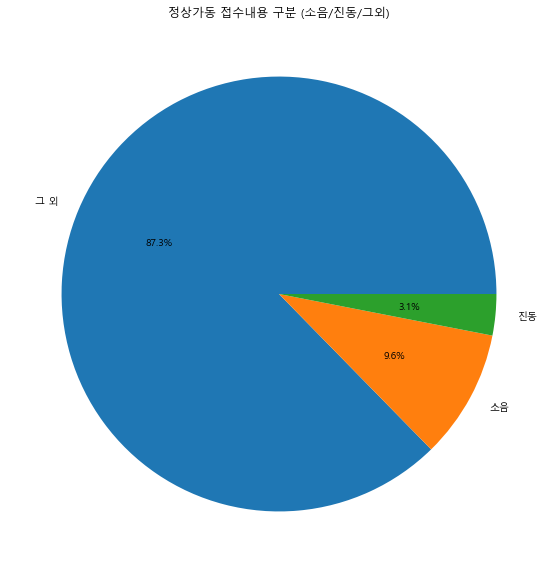

In [53]:
ratio = df_jg['접수내용 구분'].value_counts().values
labels = df_jg['접수내용 구분'].value_counts().index

plt.figure(figsize=(10, 10))

plt.title('정상가동 접수내용 구분 (소음/진동/그외)')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

- 소음이나 진동으로 인한 고장 접수는 12.7%로 대부분 다른 요인으로 인해 고장 접수를 함을 확인 가능

정상가동 접수내용 확인

In [54]:
df_jg['접수내용'].value_counts()

정지 - 정지                     682
소음 - 카 소음발생                 126
운행이상 - 도어 동작 이상             104
사람갇힘 - 운행중 정지                85
버튼및층표시기불량 - 카 내부 버튼 불량       83
운행이상 - 기타                    82
버튼및층표시기불량 - 홀 버튼 불량          79
운행이상 - 스톱현상                  52
정지 - OPEN/CLOSE반복            44
진동 - 진동발생                    37
기타사항 - 기타                    36
운행이상 - 셀렉터오동작                33
서비스사항 - 기타                   32
운행이상 - LEVEL오차               21
운행이상 - 정지불능                  18
소음 - 기타                      16
서비스사항 - 조명등 불량               12
버튼및층표시기불량 - 카 내부 층표시기 불량     12
진동 - 착상시 진동발생                11
정지 - 도어이탈로 인한 운행정지           11
서비스사항 - 인터폰 불량               11
정지 - 층간정지                    11
버튼및층표시기불량 - 홀 층표시기 불량         9
버튼및층표시기불량 - 기타                8
소음 - 도어 소음발생                  8
반복고장 - 정지                     7
소음 - 세대내 소음발생                 7
소음 - 기계실 소음발생                 6
정지 - 기타                       5
정지 - 침수                       5
반복고장 - 운행이상                   5
진동 - 출발시

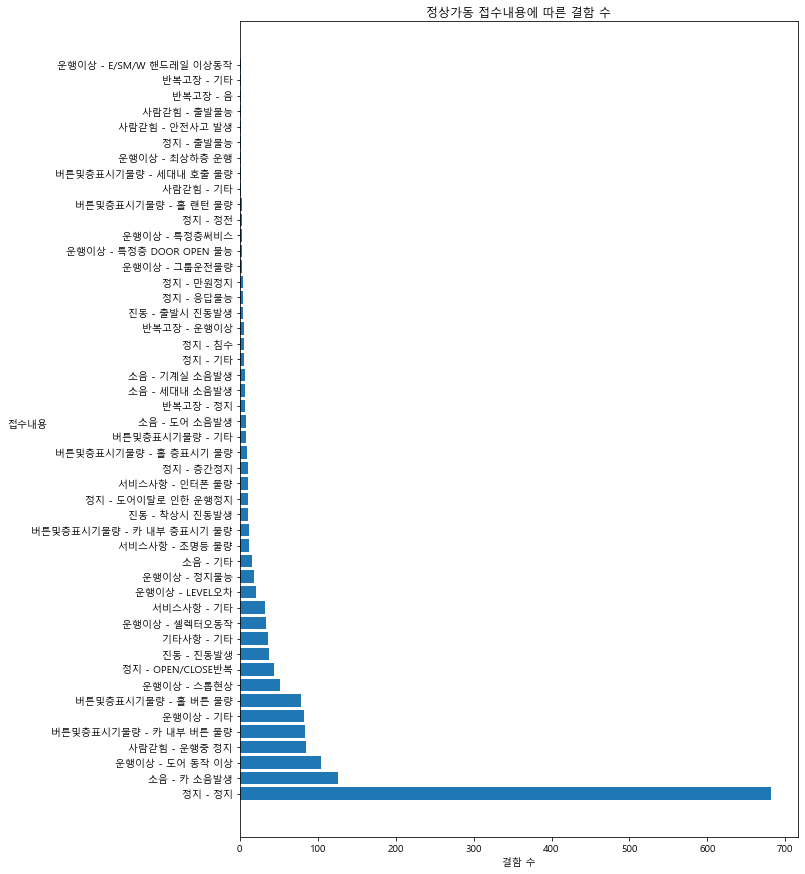

In [55]:
y = np.arange(len(df_jg['접수내용'].value_counts()))

ErrorPart = df_jg['접수내용'].value_counts().index
values = df_jg['접수내용'].value_counts().values

plt.figure(figsize=(10, 15))

plt.barh(y, values)
plt.yticks(y, ErrorPart)

plt.xlabel('결함 수')
plt.ylabel('접수내용', rotation=0)
plt.title('정상가동 접수내용에 따른 결함 수')
plt.show()

정상가동으로 인한 접수내용은 정지로 인한 접수가 많다는 것을 확인할 수 있었다! 승강기 정지는 치명적인 결함인 것 같으니 정지 고장을 위주로 추가적인 분석을 해보자

#### 1.3.5.2. 정상가동 중 정지 결함

정상가동 중 정지 결함의 고장부위2 파악

In [56]:
df_jg_stop = df_jg[df_jg['접수내용'].str.contains('정지')]
df_jg_stop

,접수번호,처리구분,고장층,접수내용,추가내용,고장부위1,고장부위2,고장원인,처리결과,접수내용 구분
12,20061231084,고장접수,00,정지 - 기타,자유운행(노량진1동 72-68 송산한의원 신축)-목동사무실 접수,ON CAR,기타,정상가동,도착시 정상,그 외
43,20061230050,고장접수,08,정지 - 정지,1동1호기,IN CAR & OPB,기타,정상가동,도착시 정상,그 외
61,20061229326,고장접수,00,정지 - 정지,강북구 수유6동 340-10 은행빌딩 - 성북사무소접수,CAR DOOR,CAR DOOR 판넬,정상가동,확인 및 점검,그 외
70,20061229194,고장접수,15,사람갇힘 - 운행중 정지,104동 1호기,HALL DOOR,HALL DOOR 판넬,정상가동,확인 및 점검,그 외
89,20061229052,고장접수,00,정지 - 정지,NaN,IN CAR & OPB,CAR FLOOR BUTTON,정상가동,도착시 정상,그 외
...,...,...,...,...,...,...,...,...,...,...
30435,20081224233,고장접수,00,사람갇힘 - 운행중 정지,사람갇힘 - 105-1/층수모름,제어반 CP,기타,정상가동,도착시 정상,그 외
30627,20081227274,고장접수,01,정지 - OPEN/CLOSE반복,정지 - 103동1호기 1층,HALL DOOR,GATE SWITCH,정상가동,조정,그 외
30642,20081228204,고장접수,00,정지 - 정지,정지 - 103-3,CAR DOOR,CAR DOOR,정상가동,도착시 정상,그 외
30765,20081230059,고장접수,05,정지 - 정지,정지 - 2호기/5층 정지/기계실 전화 달라심.,CAR DOOR,GATE SWITCH,정상가동,조정,그 외


고장부위 1과 2를 확인해보니 2가 더 자세하다. 2가 세부부품 중 어디가 고장났는지 나타내는 것 같다.

In [57]:
df_jg_stop['고장부위1'].value_counts()

IN CAR & OPB                 424
ON CAR                       138
CAR DOOR                     117
HALL DOOR                     66
제어반 CP                        65
INDICATOR & 승장버튼              22
기타 PCB                        20
승강로 & PIT & CWT                7
DOOR INV.  MOTOR. ENC.         5
INVERTER 기타                    4
T/M & BRAKE                    3
FI1 PCB                        3
ST5 & SS5 PCB                  2
HIVD INV.                      2
ST1 & SS1 PCB                  1
GOVERNER                       1
Name: 고장부위1, dtype: int64

In [58]:
df_jg_stop['고장부위2'].value_counts()

기타                               517
CAR FLOOR BUTTON                  90
CAR DOOR 판넬                       88
기타                                39
HALL DOOR 판넬                      22
CAR DOOR                          10
GATE SWITCH                        9
HALL DOOR                          9
HALL DOOR SHOE                     8
INVERTER                           8
OPB BOX S/W                        7
HALL DOOR SILL                     6
HALL UP BUTTON (HPB UP)            5
CAR HAND RAIL BRACKET              3
OPEN BUTTON                        3
INTERLOCK ASSY                     3
강제감속 LIMIT S/W                     2
BUTTON JACK                        2
통신CABLE                            2
제동저항                               2
UP DOOR INTERLOCK                  2
기타 BOARD                           2
HALL DOWN (HPB DOWN)               2
SAFETY SHOE SWITCH                 2
LCD (착상센서)                         2
착상 밴                               2
BRAKE                              2
배

정지고장의 고장부위

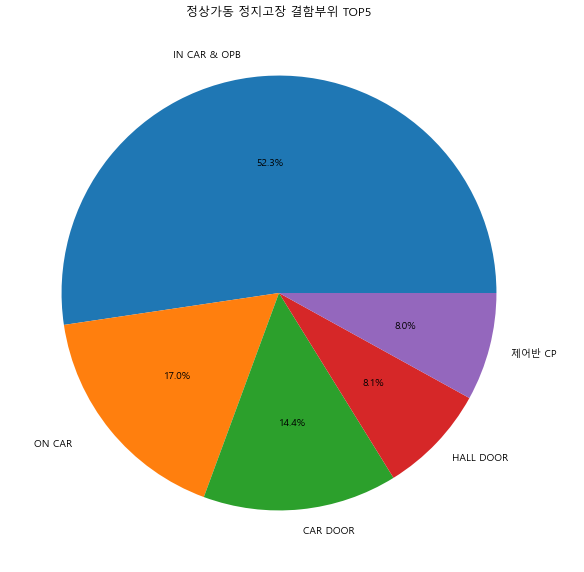

In [59]:
ratio = df_jg_stop['고장부위1'].value_counts()[:5].values
labels = df_jg_stop['고장부위1'].value_counts()[:5].index

plt.figure(figsize=(10, 10))

plt.title('정상가동 정지고장 결함부위 TOP5')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

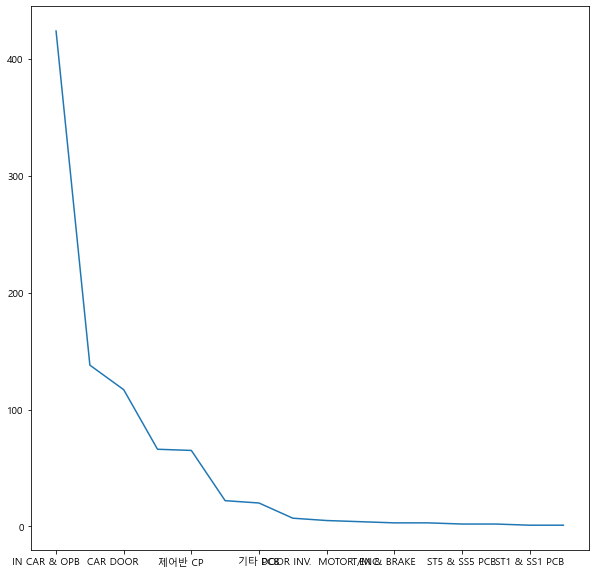

In [60]:
df_jg_stop['고장부위1'].value_counts().plot(figsize=(10,10))
plt.show()

절반 이상이 in car&opb 고장이므로 고장부위 2를 확인해본다

In [61]:
df_jg_stop[df_jg_stop['고장부위1'].str.contains('IN CAR & OPB')]['고장부위2'].value_counts()

기타                        316
CAR FLOOR BUTTON           90
OPB BOX S/W                 7
CAR HAND RAIL BRACKET       3
OPEN BUTTON                 3
CLOSE BUTTON                1
인터폰 벨                       1
OPB PANNEL                  1
조명장치(LIGHT)                 1
BUTTON JACK                 1
Name: 고장부위2, dtype: int64

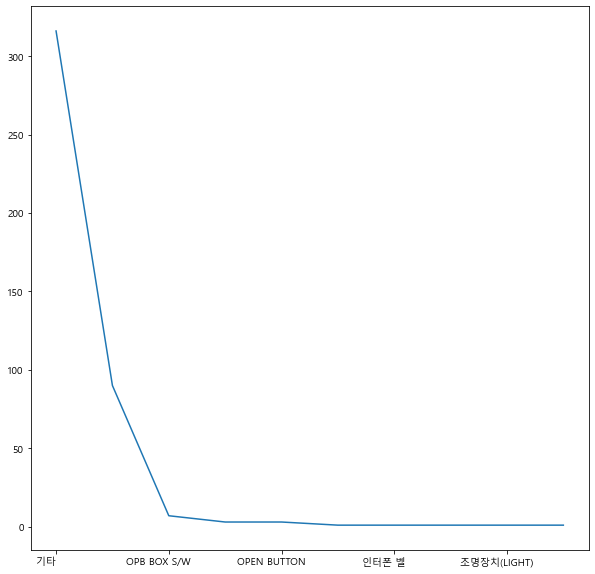

In [62]:
df_jg_stop[df_jg_stop['고장부위1'].str.contains('IN CAR & OPB')]['고장부위2'].value_counts().plot(figsize=(10,10))
plt.show()

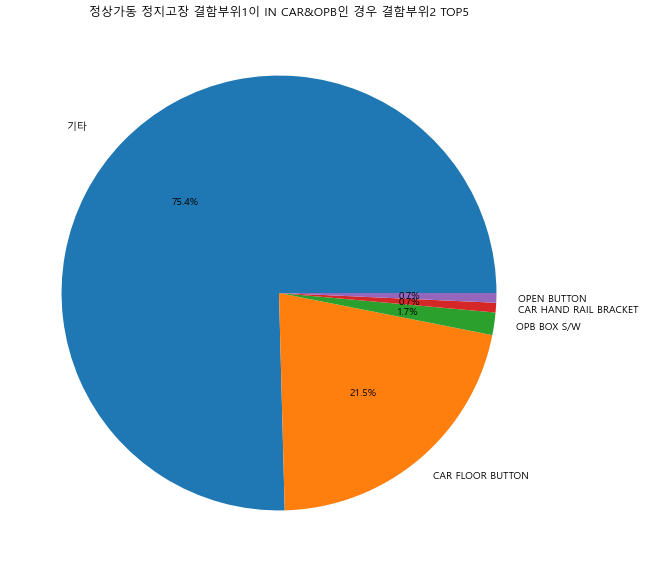

In [63]:
ratio = df_jg_stop[df_jg_stop['고장부위1'].str.contains('IN CAR & OPB')]['고장부위2'].value_counts()[:5].values
labels = df_jg_stop[df_jg_stop['고장부위1'].str.contains('IN CAR & OPB')]['고장부위2'].value_counts()[:5].index

plt.figure(figsize=(10, 10))

plt.title('정상가동 정지고장 결함부위1이 IN CAR&OPB인 경우 결함부위2 TOP5')
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

기타의 비중이 75%로 대부분이지만 그 외에서는 버튼 고장이 주다.  버튼이 약한가봄

# 2. Decision Tree를 활용한 요인별 고장 인과 관계의 분류 수행

# 3. Expert system을 이용한 결함 진단 및 알고리즘 개발

## 3.1. 승강기 진동 데이터를 Python 환경으로 옮기기

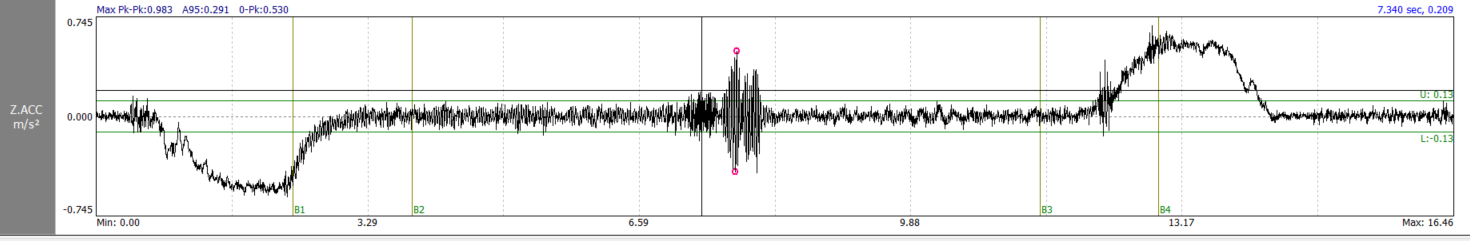

In [64]:
from IPython.display import Image
 
Image("5000277_390-00320_dn그래프.PNG")

In [65]:
df = pd.read_csv("5000277_390-00320_dn.csv")
df

,Time(Sec),Acc-X(m/s?,Acc-Y(m/s?,Acc-Z(m/s?,Sound(Pa),Dis(m),Vel(m/s),Acc(m/s?,Jerk(m/s?,RMS-X(m/s?,RMS-Y(m/s?,RMS-Z(m/s?,ISO-X(m/s?,ISO-Y(m/s?,ISO-Z(m/s?
0,0.000000,0.02354,0.01011,0.04642,0.011369,-0.00052,0.00221,0.00059,0.0,0.01076,0.02253,0.02141,0.00035,0.00015,0.00389
1,0.003906,-0.00175,0.02238,-0.00612,0.011214,-0.00051,0.00219,0.00209,0.0,0.00993,0.02262,0.02032,0.00097,0.00076,0.00997
2,0.007812,0.02447,0.01383,0.03615,0.011293,-0.00050,0.00218,0.00394,0.0,0.00993,0.02241,0.02035,0.00143,0.00165,0.01171
3,0.011719,-0.00245,0.00479,0.02044,0.011310,-0.00049,0.00217,0.00616,0.0,0.00900,0.02236,0.01950,0.00190,0.00217,0.01453
4,0.015625,0.00345,-0.00666,0.00967,0.011303,-0.00049,0.00217,0.00852,0.0,0.00919,0.02234,0.01916,0.00205,0.00214,0.01688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4211,16.449219,-0.01806,0.00205,-0.06206,0.056363,-10.17258,-0.04674,-0.00684,0.0,0.00000,0.00000,0.00000,0.00724,0.01370,-0.03478
4212,16.453125,-0.00849,-0.00081,0.01459,0.055347,-10.17277,-0.04680,-0.01104,0.0,0.00000,0.00000,0.00000,0.00627,0.01282,-0.03646
4213,16.457031,-0.04794,0.00591,-0.01020,0.054330,-10.17295,-0.04687,-0.01399,0.0,0.00000,0.00000,0.00000,0.00509,0.01238,-0.03027
4214,16.460938,-0.03924,-0.00387,0.01091,0.053525,-10.17313,-0.04696,-0.01530,0.0,0.00000,0.00000,0.00000,0.00307,0.01177,-0.02175


In [66]:
df = df[['Time(Sec)', 'Acc-Z(m/s?']]
df

,Time(Sec),Acc-Z(m/s?
0,0.000000,0.04642
1,0.003906,-0.00612
2,0.007812,0.03615
3,0.011719,0.02044
4,0.015625,0.00967
...,...,...
4211,16.449219,-0.06206
4212,16.453125,0.01459
4213,16.457031,-0.01020
4214,16.460938,0.01091


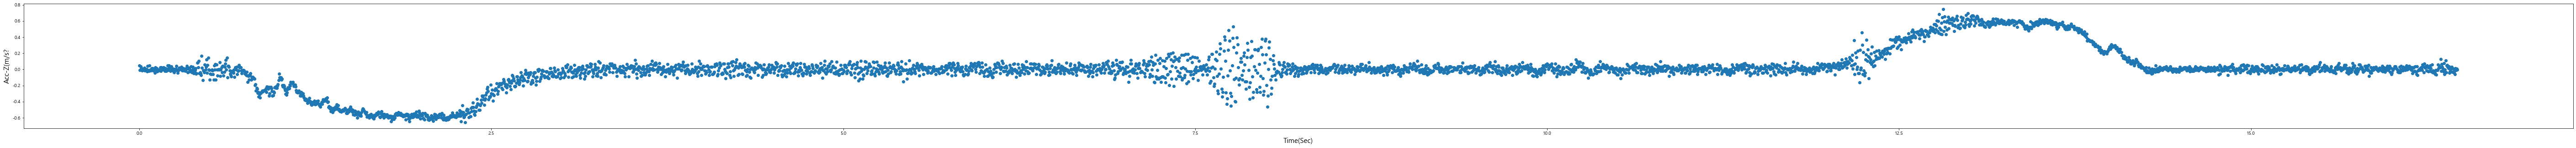

In [67]:
fig = plt.figure(figsize=(100,5))
fig.set_facecolor('white')
 
font_size = 15
plt.scatter(df['Time(Sec)'],df['Acc-Z(m/s?']) 
 
plt.xlabel('Time(Sec)', fontsize=font_size)
plt.ylabel('Acc-Z(m/s?',fontsize=font_size)
plt.show()

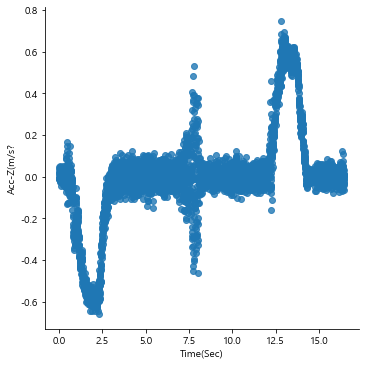

In [68]:
sns.lmplot(data = df, x = "Time(Sec)", y = "Acc-Z(m/s?", line_kws={'color':"red"}, fit_reg = False)
plt.show()

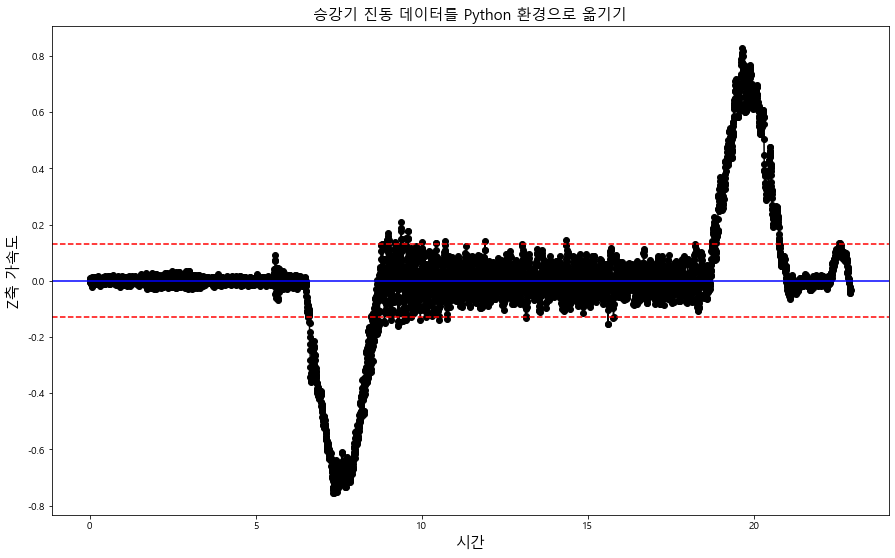

In [69]:
"""
승강기 진동 데이터를 Python 환경으로 옮기기
"""

df = pd.read_csv("Time Series Data_1.csv")
df.columns = ["time","x","y","z","sound"]

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")
plt.title("승강기 진동 데이터를 Python 환경으로 옮기기",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)
plt.show()


## 3.2. 주행 구간 경계 정하기 

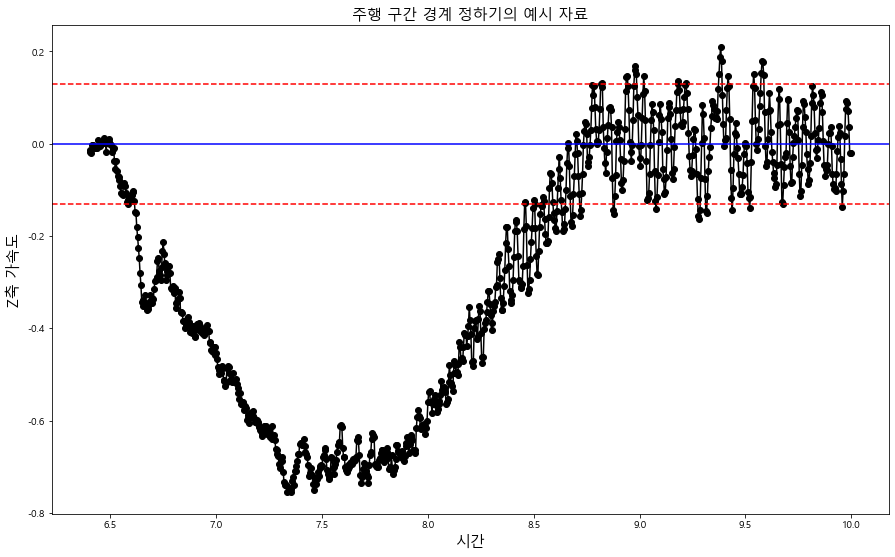

In [70]:
"""
승강기 진동 데이터를 보면 승강기가 움직이기 시작하는 가속 구간과 주행 구간 감속 구간이 있다.
가속 구간의 시작을 B1, 가속 구간의 끝이자 주행 구간의 시작을 B2, 주행 구간의 끝이자 감속 구간의 시작을 B3, 감속 구간의 끝을 B4로 지정한다.

승강기 진동 데이터의 시간에 따른 기울기를 통해 구간을 나눈다.

예시로 아래 그려지는 그림은 최소한 7초까지는 가속도가 점점 아래 방향으로 커지기 때문에 속도가 빨라진다.
"""
mask = [time>6.4 and time<10 for time in df["time"] ]
tmp_df = df[mask]
tmp_df = tmp_df.reset_index()

fig = plt.figure(figsize=(15,9))
plt.plot(tmp_df["time"],tmp_df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")
plt.title("주행 구간 경계 정하기의 예시 자료",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)
plt.show()


### 3.2.1. 회귀식을 활용한 기울기 추세 추정

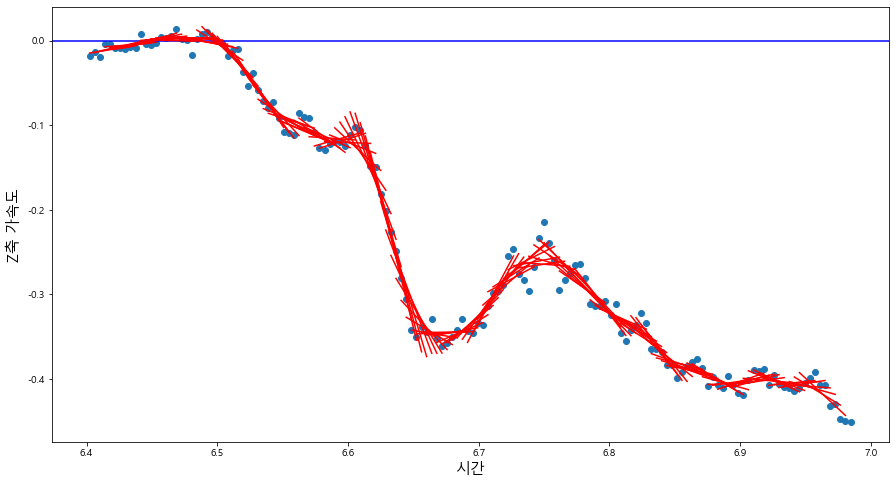

In [71]:
"""
기울기를 측정하기 위해 시간 축에 따른 진동 데이터의 회귀식을 구한다.
회귀식에 사용되는 점의 수 n = 10 일 경우

기울기의 추세가 음수가 되야 하는데 양수로 변화되는 구간이 있다. 
    -> 감속이 아닌 진동에 영향을 받기 때문에 적절하지 않음

"""
from statsmodels.formula.api import ols

def get_reg (m,n,df):

    fig = plt.figure(figsize=(15,8))
    fig.set_facecolor('white')

    font_size = 15
    """
    plt.axhline(0.13,color="red",linestyle="--")
    plt.axhline(-0.13,color="red",linestyle="--")
    """
    plt.axhline(0,color="blue")
    plt.scatter(df.loc[:m-1,"time"],df.loc[:m-1,"z"]) ## 원 데이터 산포도
    
    for num in range(m-n):
    
        fit = ols(formula = 'z ~ time', data = df[num:num+n]).fit()
        a = fit.params.time
        b = fit.params.Intercept
        """
        print("회귀방정식의 기울기: ",a)
        print("회귀방정식의 절편: ",b)
        print()
        """
        plt.plot(df.loc[num:num+n-1,"time"],fit.fittedvalues,color='red') ## 회귀직선 추가

    plt.xlabel('시간', fontsize=font_size)
    plt.ylabel('Z축 가속도',fontsize=font_size)
    plt.show()
    return a


test = get_reg(150,10,tmp_df)


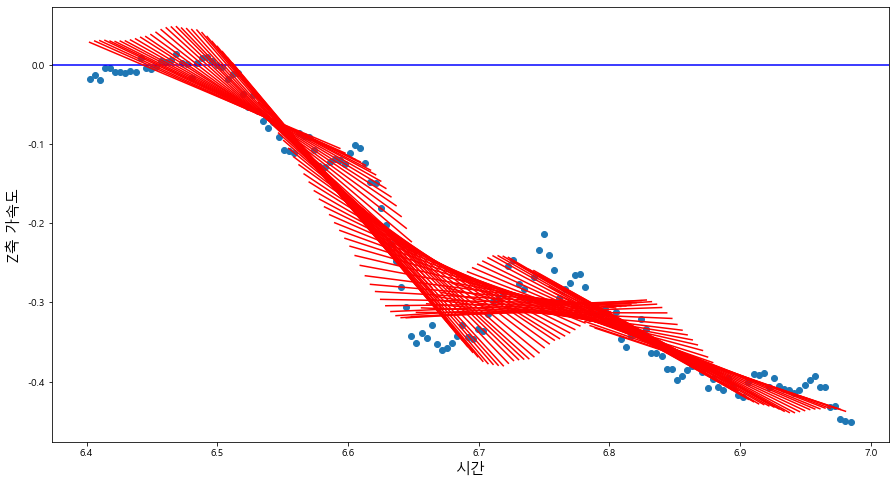

In [72]:
"""
회귀식에 사용되는 점의 수 n = 50 일 경우
기울기의 추세가 음수가 되야 한다. 양수로 변화되는 구간이 거의 없지만 확실하진 않다.

"""

test = get_reg(150,50,tmp_df)

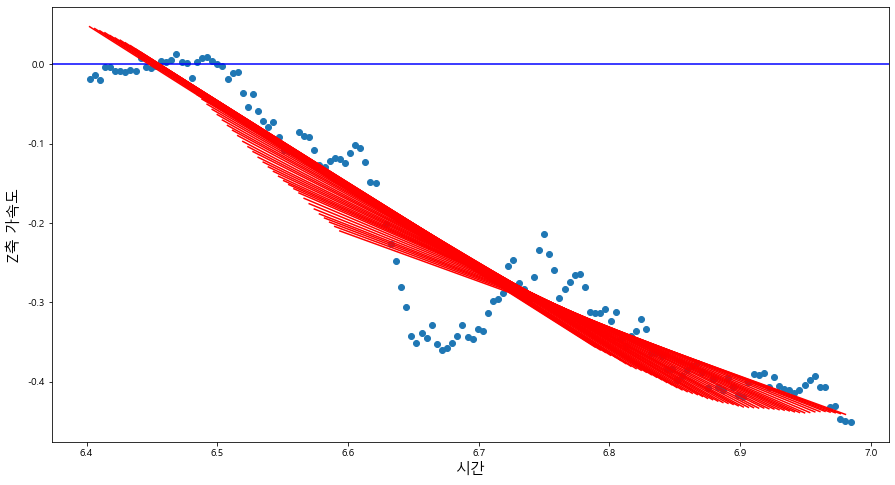

In [73]:
"""
회귀식에 사용되는 점의 수 n = 100 일 경우
기울기의 추세가 확실히 음수다.

"""
test = get_reg(150,100,tmp_df)


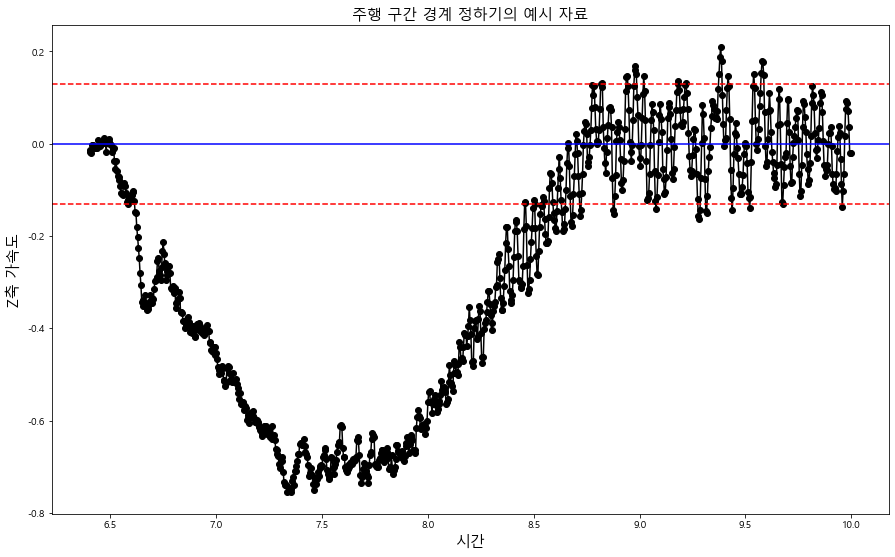

In [74]:
fig = plt.figure(figsize=(15,9))
plt.plot(tmp_df["time"],tmp_df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")
plt.title("주행 구간 경계 정하기의 예시 자료",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)
plt.show()

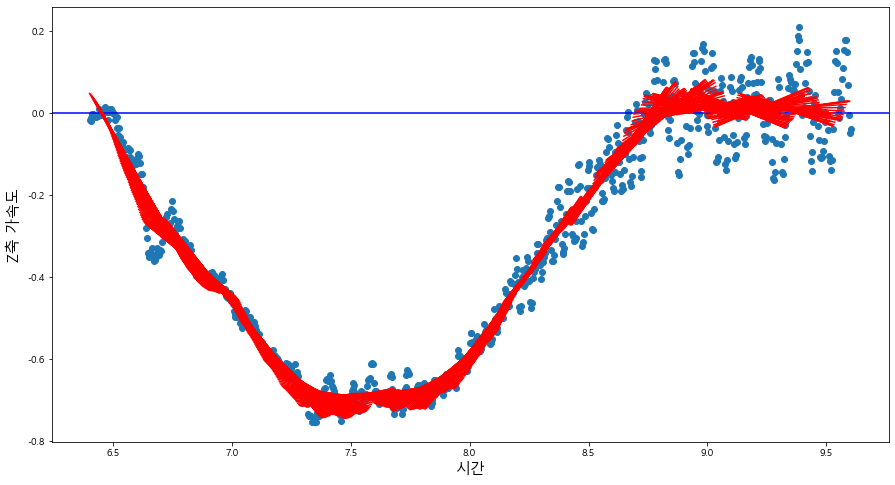

In [75]:
test = get_reg(len(tmp_df)-101,100,tmp_df)

### 3.2.2. 추정한 기울기 추세를 이용하여 시간별 기울기 측정

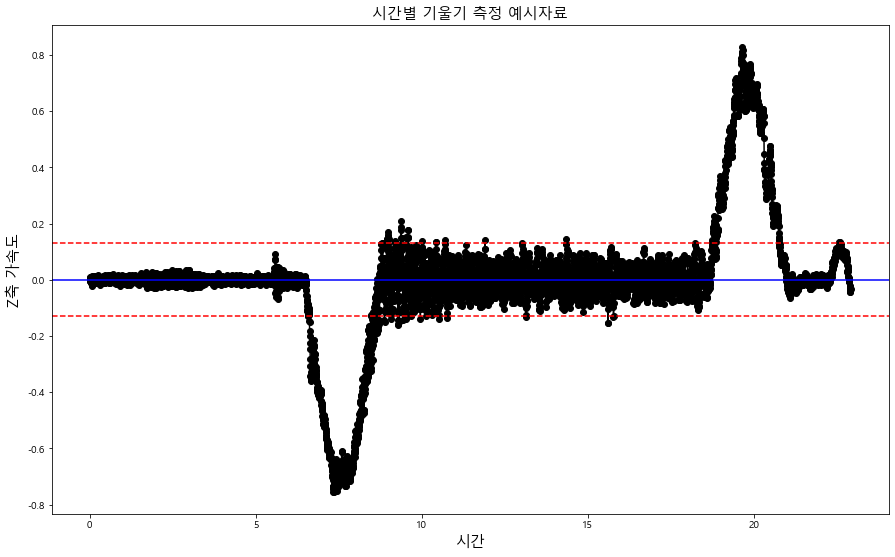

In [76]:
fig = plt.figure(figsize=(15,9))
plt.plot(df["time"],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")
plt.title("시간별 기울기 측정 예시자료",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)
plt.show()

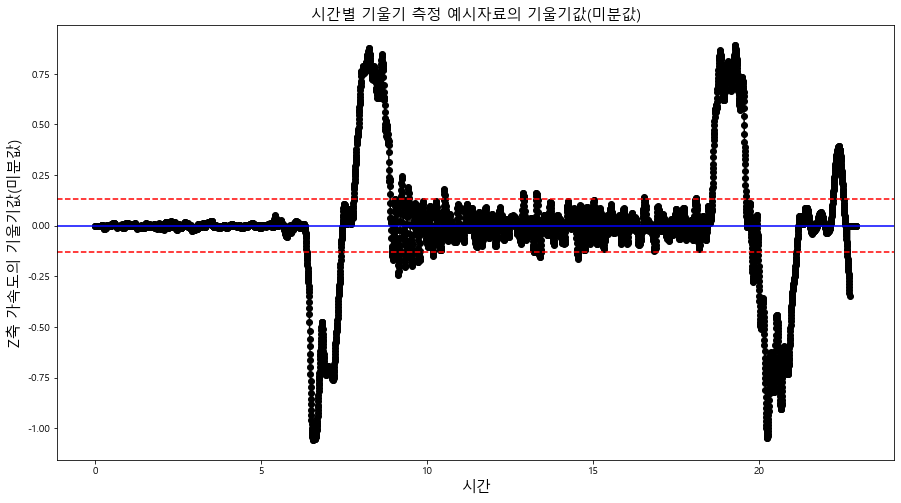

In [77]:
"""
시간별 기울기 측정 예시자료의 기울기를 보면 가속, 감속을 정확하게 볼 수 있다.
"""

"""
입력 값 : n (몇 개씩 회귀분석을 진행 할건지 ) , df (컬럼명만 바뀐 원본 데이터)

출력 값 : result_df ( 받은 데이터에서 회귀식 기울기만 추가, 0 ~ n/2  까지의 기울기는 0으로 채워짐 )

- 우려사항 : 가속 시작과 동시에 저장된 데이터이면 0~50까지의 기울기가 0이기 때문에 제대로된 판단 불가능 할 수도 있음
"""

def get_reg_df (n, df):
    reg_slop = [0 for idx in range(int(n/2))]
    
    for idx in range(len(df)-n):
        fit = ols(formula = 'z ~ time', data = df[idx:idx+n]).fit()
        reg_slop.append(fit.params.time)

    for idx in range(int(n/2)):
        reg_slop.append(0)
    
    result_df = pd.DataFrame()
    result_df["time"] = df["time"]
    result_df["slop"] = reg_slop
    return result_df

test_df = get_reg_df(100,df)

fig = plt.figure(figsize=(15,8))
fig.set_facecolor('white')

font_size = 15

plt.plot(test_df["time"],test_df["slop"],linestyle="-",marker="o",color="black") ## 회귀직선 추가
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")
plt.title("시간별 기울기 측정 예시자료의 기울기값(미분값)",fontsize=15)
plt.xlabel('시간', fontsize=font_size)
plt.ylabel('Z축 가속도의 기울기값(미분값)',fontsize=font_size)
plt.show()


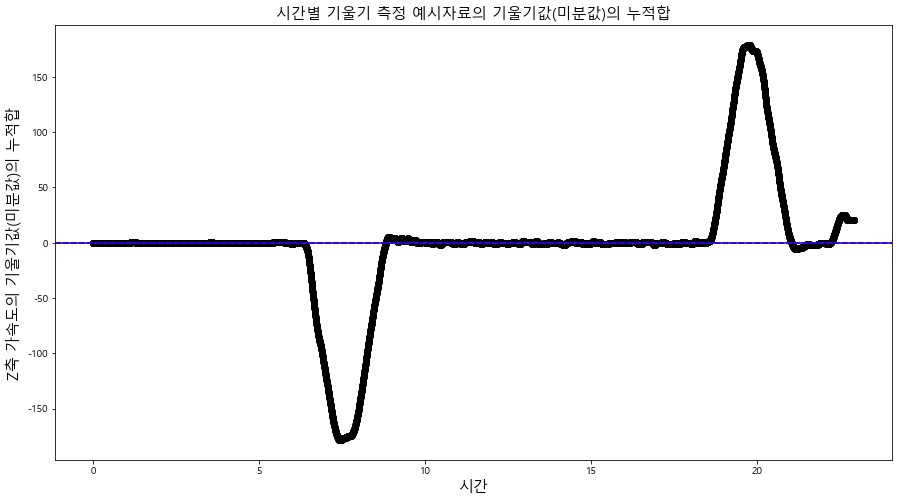

In [78]:

"""
Z축 가속도의 기울기값(미분값)을 계속 더하는 누적합 그래프를 그려본다. 
이렇게 하면 이상치에 둔감한 가속, 감속 구간을 찾을 수 있다.
"""
sum_slop = 0
s_slop_list= []
for value in test_df["slop"]:
    sum_slop += value
    s_slop_list.append(sum_slop)
test_df["s_slop"] = s_slop_list
test_df.head()


fig = plt.figure(figsize=(15,8))
fig.set_facecolor('white')

font_size = 15

plt.plot(test_df["time"],test_df["s_slop"],linestyle="-",marker="o",color="black") ## 회귀직선 추가
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")
plt.title("시간별 기울기 측정 예시자료의 기울기값(미분값)의 누적합",fontsize=15)
plt.xlabel('시간', fontsize=font_size)
plt.ylabel('Z축 가속도의 기울기값(미분값)의 누적합',fontsize=font_size)
plt.show()


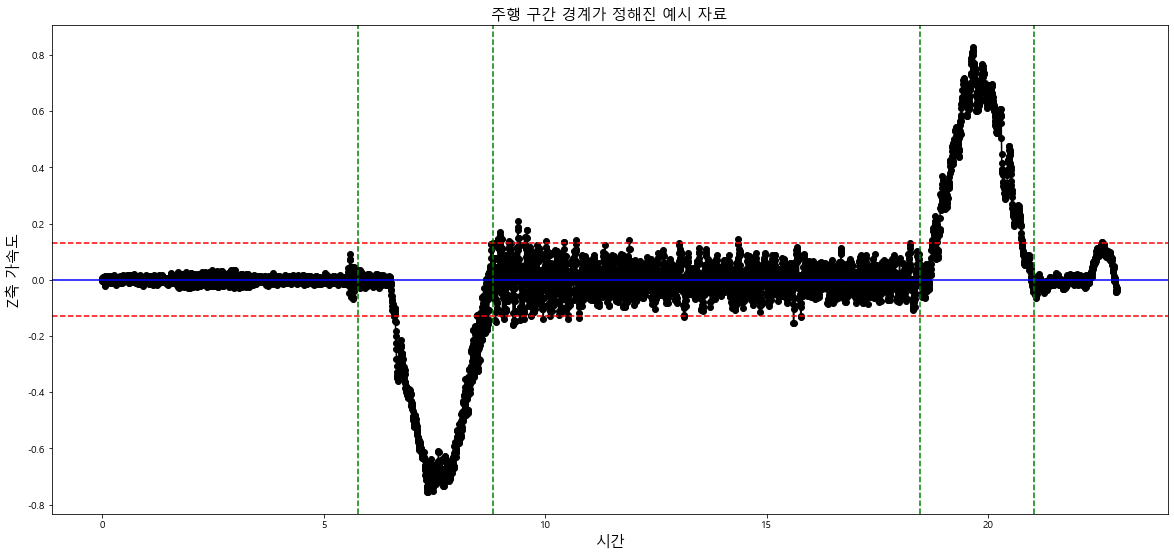

In [79]:
"""
주행 구간 경계 정하기
1. 누적합이 가장 큰 곳, 작은 곳을 찾는다. 
2. 큰 곳에서 양 옆으로 0이 되는 시간을 찾는다.
3. 작은 곳에서 양 옆으로 0이 되는 시간을 찾는다. 
4. 시간 순서대로 나열한다.
5. B1,B2,B3,B4 로 표현한다.
"""

up_time = float(test_df.loc[test_df["s_slop"]== max(test_df["s_slop"]),"time"])
down_time = float(test_df.loc[test_df["s_slop"]== min(test_df["s_slop"]),"time"])

def get_0_times_down (time,df):
    df = df.reset_index()
    
    idx = df.index[df["time"]==time]
    
    r_time = 0
    l_time = 0
    r_idx = idx+1
    l_idx = idx-1
    
    while r_idx < len(df):
        if 0 <= float(df.loc[r_idx,"s_slop"]):
            r_time = float(df.loc[r_idx,"time"])
            break
        r_idx+=1
    
    while l_idx > 0:
        if 0 <= float(df.loc[l_idx,"s_slop"]):
            l_time = float(df.loc[l_idx,"time"])
            break
        l_idx-=1
    
    if r_time == 0 :
        print("================erro===========")
        print("오른쪽 0 값을 찾을 수가 없습니다.")
    
    if l_time == 0 :
        print("================erro===========")
        print("왼쪽 0 값을 찾을 수가 없습니다.")
        
    return l_time,r_time

def get_0_times_up (time,df):
    df = df.reset_index()
    
    idx = df.index[df["time"]==time]
    
    r_time = 0
    l_time = 0
    r_idx = idx+1
    l_idx = idx-1
    
    while r_idx < len(df):
        if 0 >= float(df.loc[r_idx,"s_slop"]):
            r_time = float(df.loc[r_idx,"time"])
            break
        r_idx+=1
    
    while l_idx > 0:
        if 0 >= float(df.loc[l_idx,"s_slop"]):
            l_time = float(df.loc[l_idx,"time"])
            break
        l_idx-=1
    
    if r_time == 0 :
        print("================erro===========")
        print("오른쪽 0 값을 찾을 수가 없습니다.")
    
    if l_time == 0 :
        print("================erro===========")
        print("왼쪽 0 값을 찾을 수가 없습니다.")
        
    return l_time,r_time


test1 = get_0_times_down(down_time,test_df)
test2 = get_0_times_up(up_time,test_df)


fig = plt.figure(figsize=(20,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

plt.axvline(test1[0],color="green",linestyle="--")

plt.axvline(test1[1],color="green",linestyle="--")

plt.axvline(test2[0],color="green",linestyle="--")

plt.axvline(test2[1],color="green",linestyle="--")


plt.title("주행 구간 경계가 정해진 예시 자료",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


### 3.2.3. 주행 구간 경계 정하기 예시

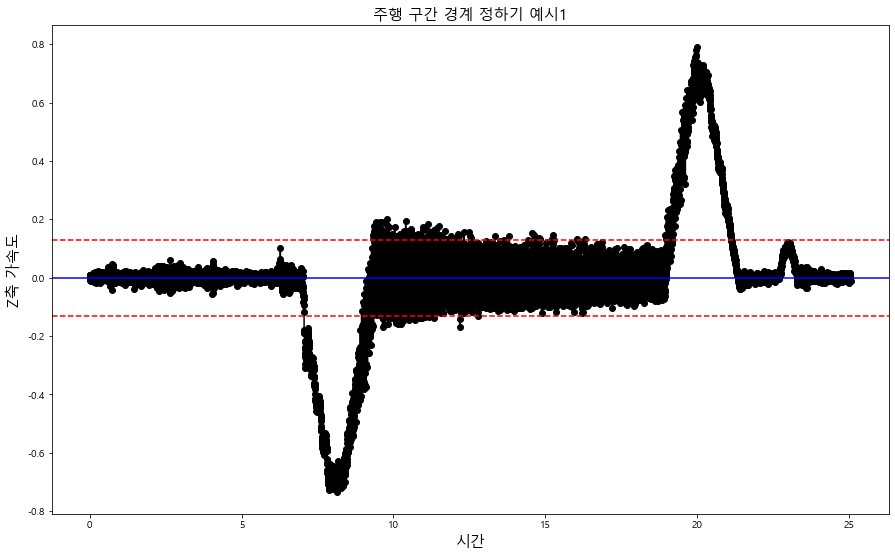

In [80]:
"""
불러올 데이터
"""
df = pd.read_csv("Time Series Data_2.csv")
df.columns = ["time","x","y","z","sound"]

"""
원 데이터 확인 
"""
fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")
plt.title("주행 구간 경계 정하기 예시1",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


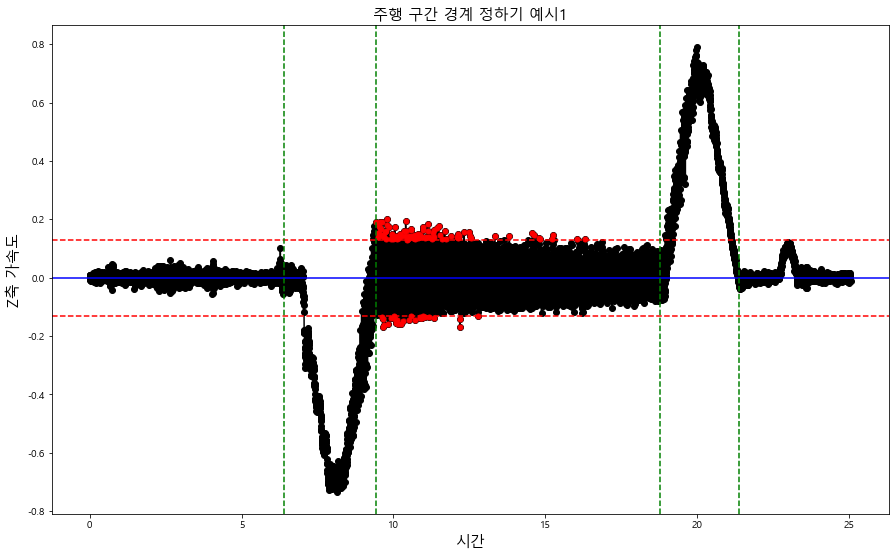

In [81]:
"""
df 에서 기울기 누적합을 추가하는 함수
"""

def get_cumsum_slop_df (df):
    sum_slop = 0
    s_slop_list= []
    for value in df["slop"]:
        sum_slop += value
        s_slop_list.append(sum_slop)
    df["s_slop"] = s_slop_list
    return df

"""
B1,B2,B3,B4 구하는 함수
"""

def get_B1_to_B4 (df):
    up_time = float(df.loc[df["s_slop"]== max(df["s_slop"]),"time"])
    down_time = float(df.loc[df["s_slop"]== min(df["s_slop"]),"time"])

    result_time = []

    down_times = get_0_times_down(down_time,df)
    up_times = get_0_times_up(up_time,df)

    if down_times[0] > up_times[0]:
        result_time.append(up_times)
        result_time.append(down_times)
    else:
        result_time.append(down_times)
        result_time.append(up_times)
    
    return result_time

test_df = get_reg_df(100,df)
test_df = get_cumsum_slop_df(test_df)
result_time = get_B1_to_B4(test_df)

"""
구간을 나눈 데이터
"""
fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 경계 정하기 예시1",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


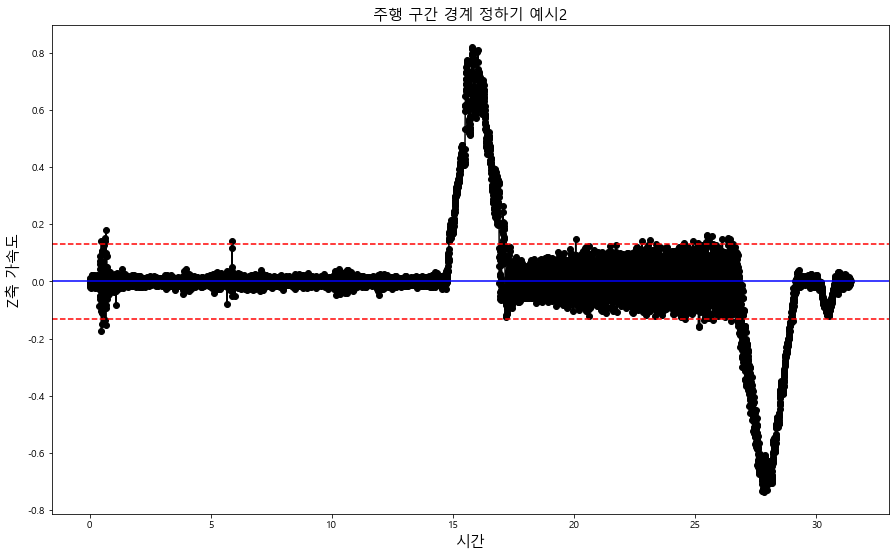

In [82]:
"""
불러올 데이터
"""
df = pd.read_csv("Time Series Data_3.csv")
df.columns = ["time","x","y","z","sound"]


"""
원 데이터 확인 
"""
fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")
plt.title("주행 구간 경계 정하기 예시2",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


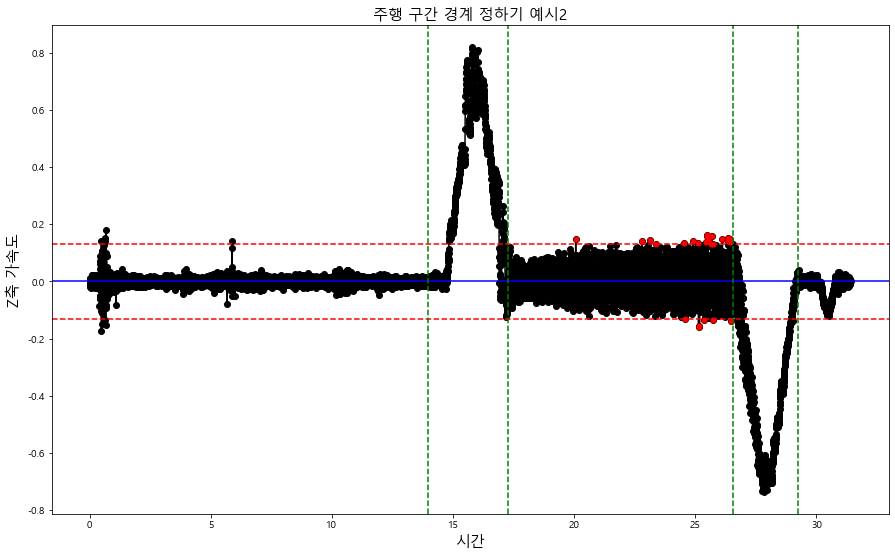

In [83]:
test_df = get_reg_df(100,df)
test_df = get_cumsum_slop_df(test_df)
result_time = get_B1_to_B4(test_df)

"""
구간을 나눈 데이터
"""
fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 경계 정하기 예시2",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


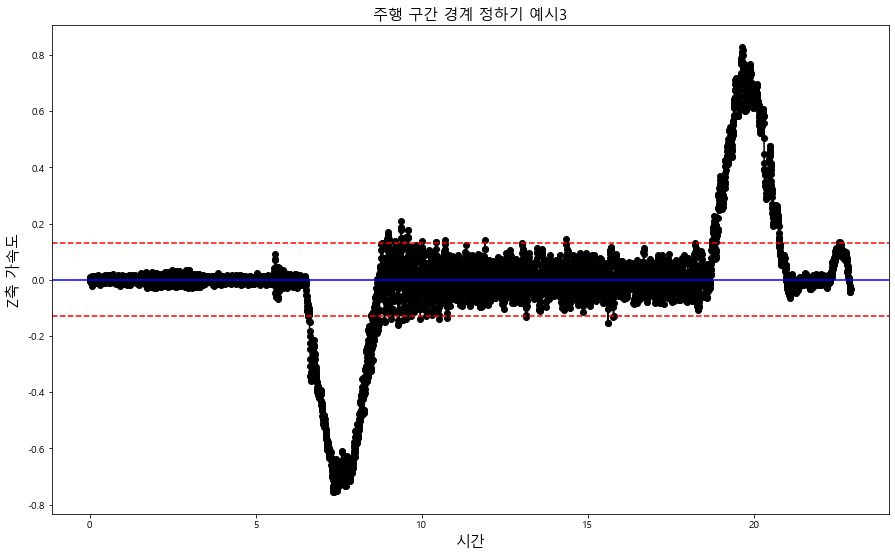

In [84]:
"""
불러올 데이터
"""
df = pd.read_csv("Time Series Data_4.csv")
df.columns = ["time","x","y","z","sound"]


"""
원 데이터 확인 
"""
fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")
plt.title("주행 구간 경계 정하기 예시3",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


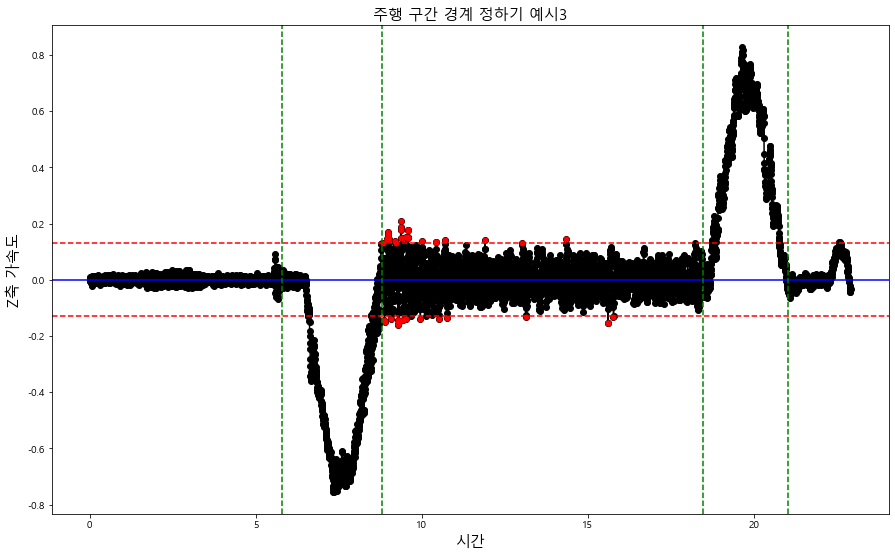

In [85]:
test_df = get_reg_df(100,df)
test_df = get_cumsum_slop_df(test_df)
result_time = get_B1_to_B4(test_df)

"""
구간을 나눈 데이터
"""
fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 경계 정하기 예시3",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


### 3.2.4. 주행 구간 아닌 부분 자르기

In [86]:
"""
입력 값 : n (몇 개씩 회귀분석을 진행 할건지 ) , df (컬럼명만 바뀐 원본 데이터)

출력 값 : result_df ( 받은 데이터에서 회귀식 기울기만 추가, 0 ~ n/2  까지의 기울기는 0으로 채워짐 )

- 우려사항 : 가속 시작과 동시에 저장된 데이터이면 0~50까지의 기울기가 0이기 때문에 제대로된 판단 불가능 할 수도 있음
"""

def get_reg_df (n, df):
    reg_slop = [0 for idx in range(int(n/2))]
    
    for idx in range(len(df)-n):
        fit = ols(formula = 'z ~ time', data = df[idx:idx+n]).fit()
        reg_slop.append(fit.params.time)

    for idx in range(int(n/2)):
        reg_slop.append(0)
    
    result_df = pd.DataFrame()
    result_df["time"] = df["time"]
    result_df["slop"] = reg_slop
    return result_df

"""
기존 df 에서 기울기 누적합을 추가하는 것 
"""

def get_cumsum_slop_df (df):
    sum_slop = 0
    s_slop_list= []
    for value in df["slop"]:
        sum_slop += value
        s_slop_list.append(sum_slop)
    df["s_slop"] = s_slop_list
    return df

"""
기울기 가중값에서 빈도수가 가장 많은 값 찾기
기준으로 하기 위함
"""

def get_center_s_slop (df):
    tmp_df = df.copy()
    slop_list = [round(value,1) for value in df["s_slop"]]
    tmp_df["s_slop"] = slop_list

    value, count = np.unique(tmp_df["s_slop"],return_counts=True)
    
    tmp = pd.DataFrame()
    tmp["value"] = value
    tmp["count"] = count
    tmp = tmp.sort_values("count",ascending=False)
    tmp = tmp.reset_index()
    return float(tmp.loc[0,"value"])

"""

get_0_times_down : 
입력 값 : time (누적합이 가장 작은 시간),df
출력 값 : (l_time,r_time) -> 누적합이 0 이하인 곳의 구간

get_0_times_up : 
입력 값 : time (누적합이 가장 큰 시간),df
출력 값 : (l_time,r_time) -> 누적합이 0 이상인 곳의 구간

"""

def get_0_times_down (time,df):
    df = df.reset_index()
    
    idx = df.index[df["time"]==time]
    
    r_time = 0
    l_time = 0
    r_idx = idx+1
    l_idx = idx-1
    center = get_center_s_slop(df)

    
    while r_idx < len(df):
        if center <= float(df.loc[r_idx,"s_slop"]):
            r_time = float(df.loc[r_idx,"time"])
            break
        r_idx+=1
    
    while l_idx > 0:
        if center <= float(df.loc[l_idx,"s_slop"]):
            l_time = float(df.loc[l_idx,"time"])
            break
        l_idx-=1
    
    if r_time == 0 :
        r_time = df.loc[len(df)-1,"time"]

        print("================erro===========")
        print("오른쪽 0 값을 찾을 수가 없습니다.")
    
    if l_time == 0 :
        print("================erro===========")
        print("왼쪽 0 값을 찾을 수가 없습니다.")
        
    return l_time,r_time

def get_0_times_up (time,df):
    df = df.reset_index()
    
    idx = df.index[df["time"]==time]
    
    r_time = 0
    l_time = 0
    r_idx = idx+1
    l_idx = idx-1
    center = get_center_s_slop(df)

    
    while r_idx < len(df):
        if center >= float(df.loc[r_idx,"s_slop"]):
            r_time = float(df.loc[r_idx,"time"])
            break
        r_idx+=1
    
    while l_idx > 0:
        if center >= float(df.loc[l_idx,"s_slop"]):
            l_time = float(df.loc[l_idx,"time"])
            break
        l_idx-=1
    
    if r_time == 0 :
        r_time = df.loc[len(df)-1,"time"]

        print("================erro===========")
        print("오른쪽 0 값을 찾을 수가 없습니다.")
    
    if l_time == 0 :
        print("================erro===========")
        print("왼쪽 0 값을 찾을 수가 없습니다.")
        
    return l_time,r_time

"""
B1,B2,B3,B4 구하기
"""

def get_B1_to_B4 (df):
    up_time = float(df.loc[df["s_slop"]== max(df["s_slop"]),"time"])
    down_time = float(df.loc[df["s_slop"]== min(df["s_slop"]),"time"])

    result_time = []

    down_times = get_0_times_down(down_time,df)
    up_times = get_0_times_up(up_time,df)

    if down_times[0] > up_times[0]:
        result_time.append(up_times)
        result_time.append(down_times)
    else:
        result_time.append(down_times)
        result_time.append(up_times)
    
    return result_time

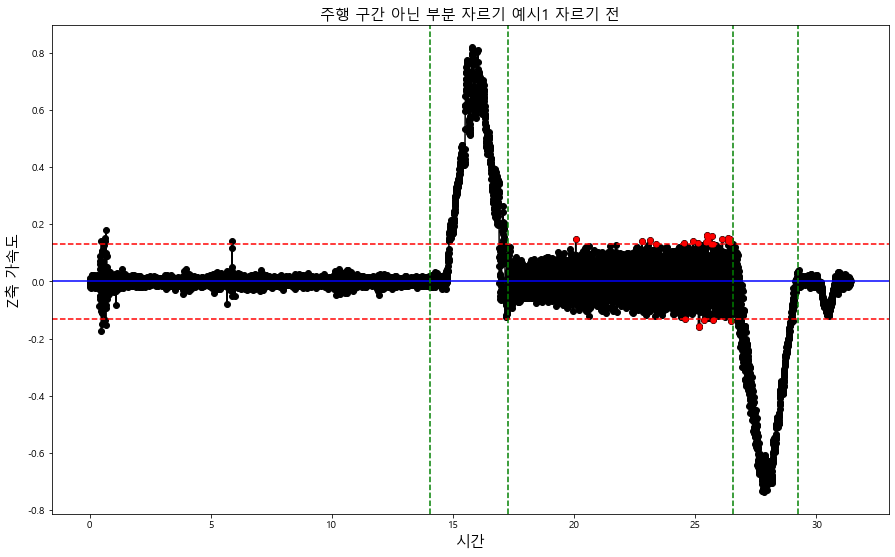

In [87]:
df = pd.read_csv("5000634_305-01986_20210618104843_up_RQ.csv", encoding='ISO-8859-1', header=3)
df = df.iloc[:,[0,1,2,3,4]]
df.columns = ["time","x","y","z","sound"]

test_df = get_reg_df(100,df)
test_df = get_cumsum_slop_df(test_df)
result_time = get_B1_to_B4(test_df)

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시1 자르기 전",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


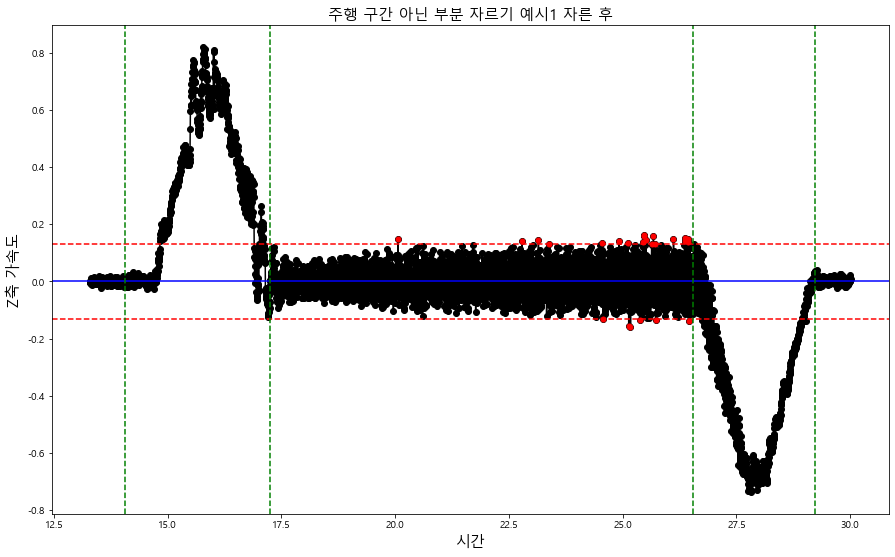

In [88]:
b1 = 0
b4 = 0

for i in range(len(df)):
    if df.iloc[i,0] == result_time[0][0]:
        if i > 200:
            b1 = i - 200
        else:
            b1 = i
            
    if df.iloc[i,0] == result_time[1][1]:
        if i < len(df) - 200:
            b4 = i + 200
        else:
            b4 = i
        
df = df.iloc[b1:b4,[0,3]]

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시1 자른 후",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


================erro===========
왼쪽 0 값을 찾을 수가 없습니다.


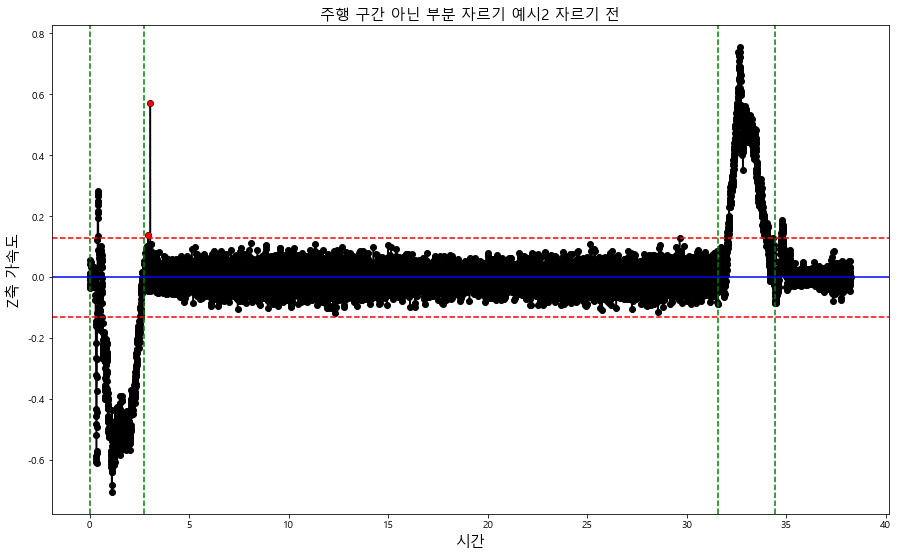

In [89]:
df = pd.read_csv("5000230_390-00365_20210615115246_dn_RQ.csv", encoding='ISO-8859-1', header=3)
df = df.iloc[:,[0,1,2,3,4]]
df.columns = ["time","x","y","z","sound"]

test_df = get_reg_df(100,df)
test_df = get_cumsum_slop_df(test_df)
result_time = get_B1_to_B4(test_df)

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시2 자르기 전",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


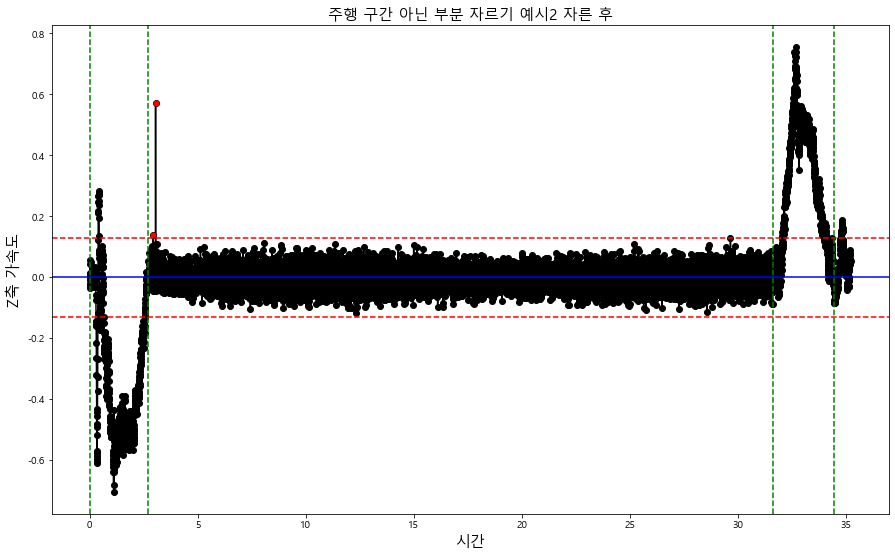

In [90]:
b1 = 0
b4 = 0

for i in range(len(df)):
    if df.iloc[i,0] == result_time[0][0]:
        if i > 200:
            b1 = i - 200
        else:
            b1 = i
            
    if df.iloc[i,0] == result_time[1][1]:
        if i < len(df) - 200:
            b4 = i + 200
        else:
            b4 = i
        
df = df.iloc[b1:b4,[0,3]]

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시2 자른 후",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


================erro===========
왼쪽 0 값을 찾을 수가 없습니다.


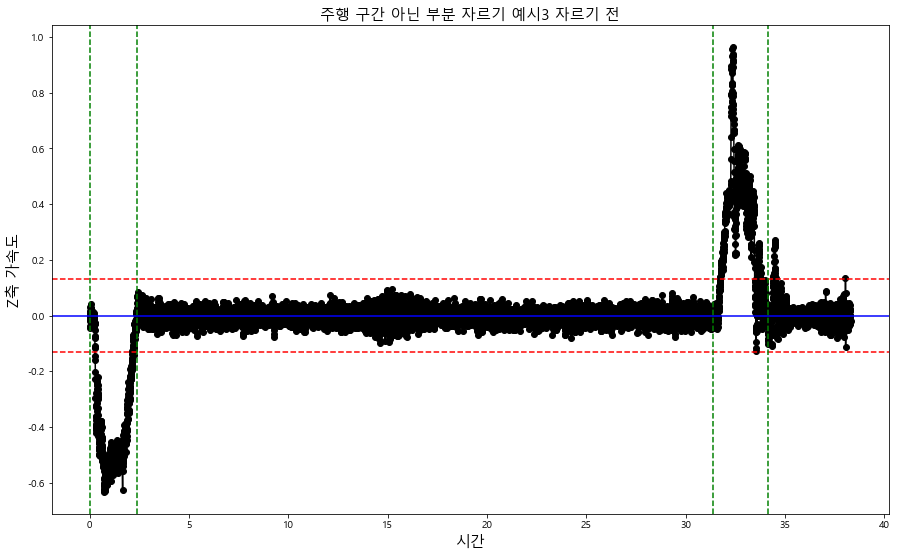

In [91]:
df = pd.read_csv("5000228_390-00358_20210615103708_dn_RQ.csv", encoding='ISO-8859-1', header=3)
df = df.iloc[:,[0,1,2,3,4]]
df.columns = ["time","x","y","z","sound"]

test_df = get_reg_df(100,df)
test_df = get_cumsum_slop_df(test_df)
result_time = get_B1_to_B4(test_df)

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시3 자르기 전",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


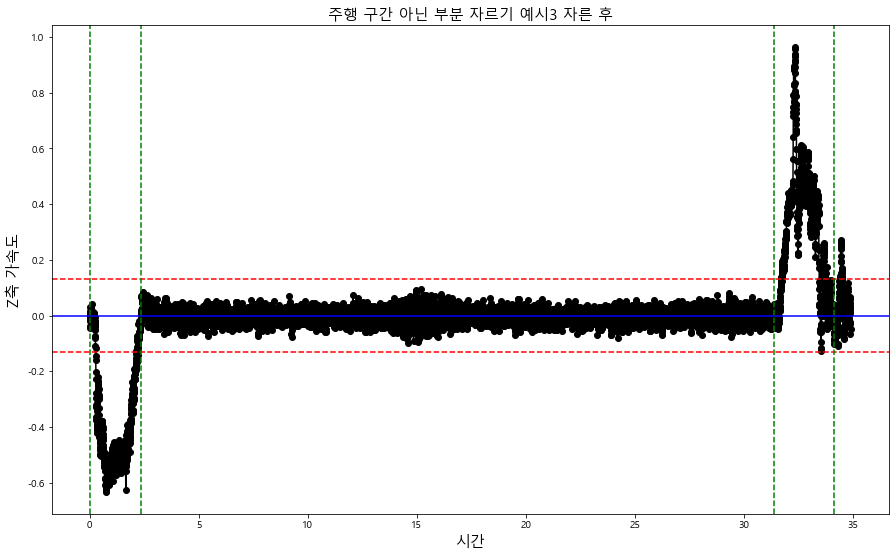

In [92]:
b1 = 0
b4 = 0

for i in range(len(df)):
    if df.iloc[i,0] == result_time[0][0]:
        if i > 200:
            b1 = i - 200
        else:
            b1 = i
            
    if df.iloc[i,0] == result_time[1][1]:
        if i < len(df) - 200:
            b4 = i + 200
        else:
            b4 = i
        
df = df.iloc[b1:b4,[0,3]]

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시3 자른 후",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


================erro===========
오른쪽 0 값을 찾을 수가 없습니다.


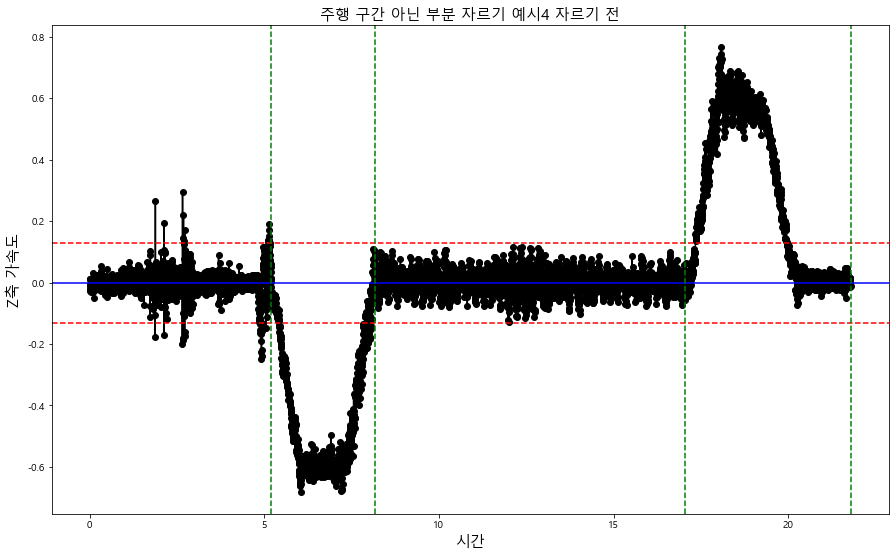

In [93]:
df = pd.read_csv("4011049_233-00154_20210614154215_dn_RQ.csv", encoding='ISO-8859-1', header=3)
df = df.iloc[:,[0,1,2,3,4]]
df.columns = ["time","x","y","z","sound"]

test_df = get_reg_df(100,df)
test_df = get_cumsum_slop_df(test_df)
result_time = get_B1_to_B4(test_df)

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시4 자르기 전",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


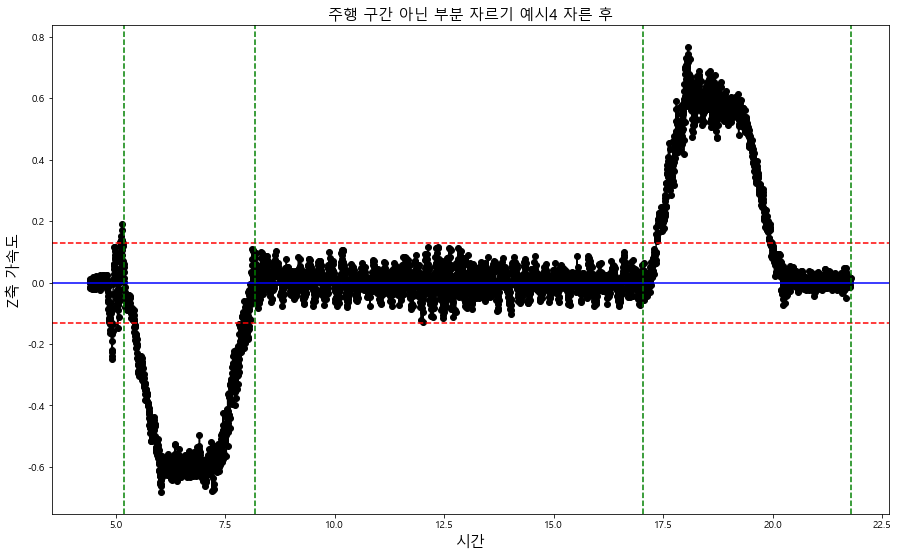

In [94]:
b1 = 0
b4 = 0

for i in range(len(df)):
    if df.iloc[i,0] == result_time[0][0]:
        if i > 200:
            b1 = i - 200
        else:
            b1 = i
            
    if df.iloc[i,0] == result_time[1][1]:
        if i < len(df) - 200:
            b4 = i + 200
        else:
            b4 = i
        
df = df.iloc[b1:b4,[0,3]]

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시4 자른 후",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


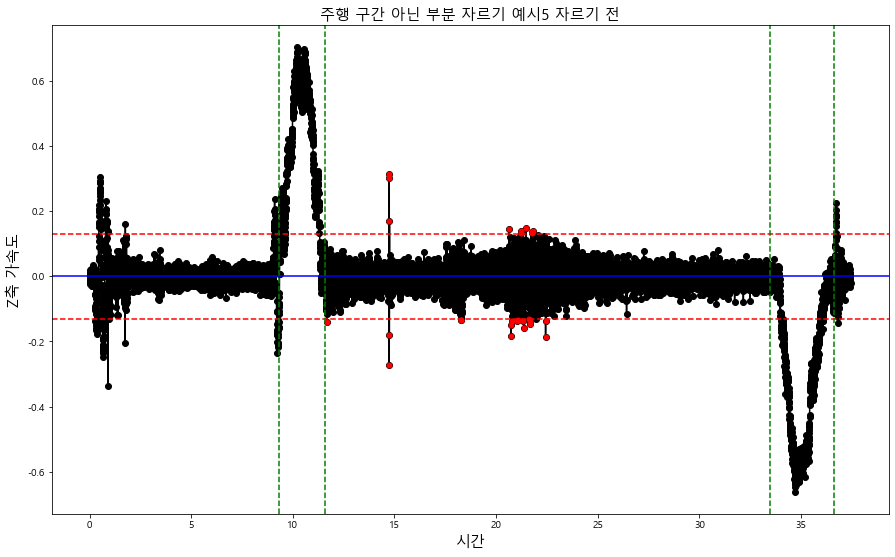

In [95]:
df = pd.read_csv("4004011_233-00157_20210621154241_up_RQ.csv", encoding='ISO-8859-1', header=3)
df = df.iloc[:,[0,1,2,3,4]]
df.columns = ["time","x","y","z","sound"]

test_df = get_reg_df(100,df)
test_df = get_cumsum_slop_df(test_df)
result_time = get_B1_to_B4(test_df)

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시5 자르기 전",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


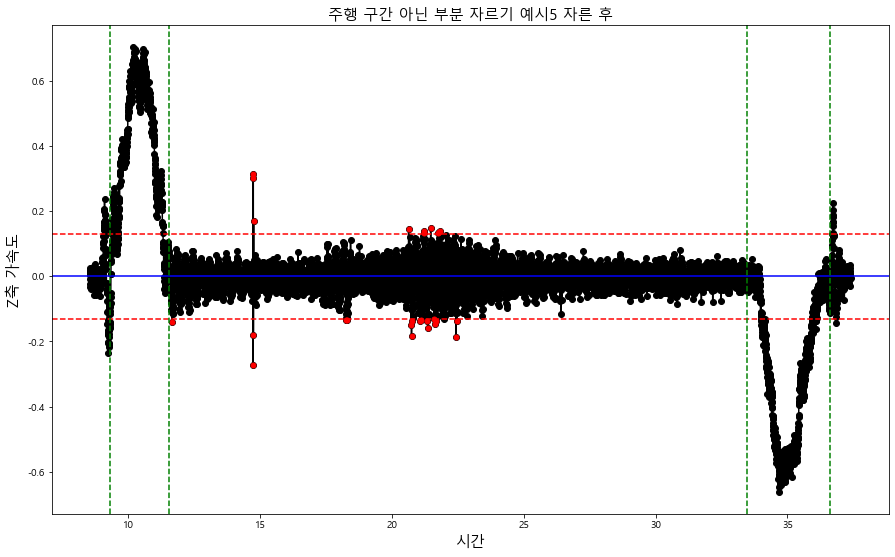

In [96]:
b1 = 0
b4 = 0

for i in range(len(df)):
    if df.iloc[i,0] == result_time[0][0]:
        if i > 200:
            b1 = i - 200
        else:
            b1 = i
            
    if df.iloc[i,0] == result_time[1][1]:
        if i < len(df) - 200:
            b4 = i + 200
        else:
            b4 = i
        
df = df.iloc[b1:b4,[0,3]]

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시5 자른 후",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


================erro===========
오른쪽 0 값을 찾을 수가 없습니다.


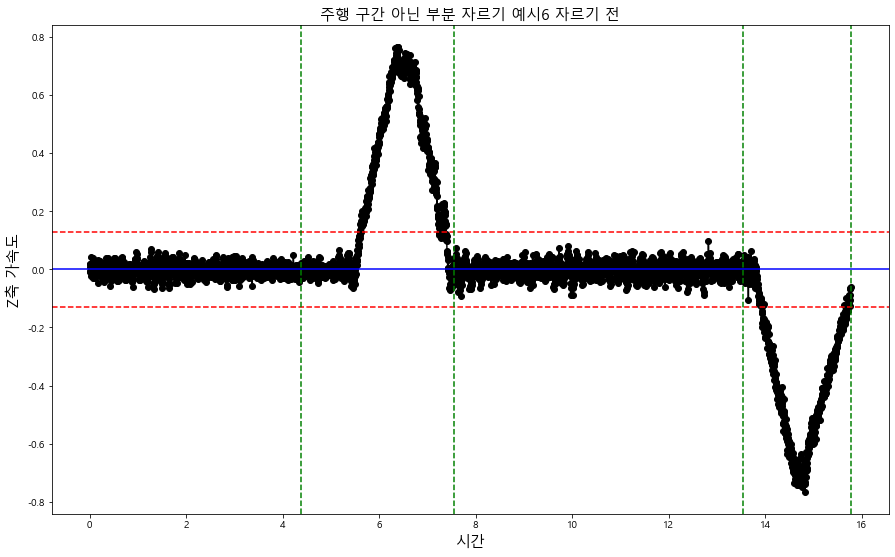

In [97]:
df = pd.read_csv("4002939_215-00229_20210624103428_up_RQ.csv", encoding='ISO-8859-1', header=3)
df = df.iloc[:,[0,1,2,3,4]]
df.columns = ["time","x","y","z","sound"]

test_df = get_reg_df(100,df)
test_df = get_cumsum_slop_df(test_df)
result_time = get_B1_to_B4(test_df)

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시6 자르기 전",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


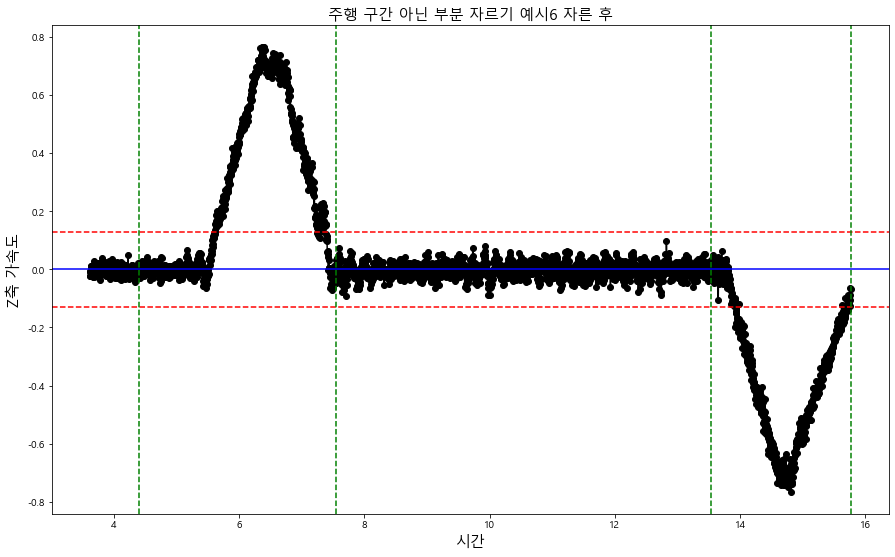

In [98]:
b1 = 0
b4 = 0

for i in range(len(df)):
    if df.iloc[i,0] == result_time[0][0]:
        if i > 200:
            b1 = i - 200
        else:
            b1 = i
            
    if df.iloc[i,0] == result_time[1][1]:
        if i < len(df) - 200:
            b4 = i + 200
        else:
            b4 = i
        
df = df.iloc[b1:b4,[0,3]]

fig = plt.figure(figsize=(15,9))
plt.plot(df["time"][:],df["z"][:],linestyle="-",marker="o",color="black")
plt.axhline(0.13,color="red",linestyle="--")
plt.axhline(-0.13,color="red",linestyle="--")
plt.axhline(0,color="blue")

mask = [time >result_time[0][1] and time<result_time[1][0] for time in df["time"]]
tmp_df = df[mask]

for time,value in zip(tmp_df["time"],tmp_df["z"]):

    if value > 0.13 or value < -0.13:
        plt.plot(time,value, marker="o", markersize=5, color='red')


plt.axvline(result_time[0][0],color="green",linestyle="--")
plt.axvline(result_time[0][1],color="green",linestyle="--")
plt.axvline(result_time[1][0],color="green",linestyle="--")
plt.axvline(result_time[1][1],color="green",linestyle="--")

plt.title("주행 구간 아닌 부분 자르기 예시6 자른 후",fontsize=15)
plt.xlabel("시간",fontsize=15)
plt.ylabel("Z축 가속도",fontsize=15)

plt.show()


## 3.3. 머신러닝 모델을 이용한 결함 진단 알고리즘

### 3.3.1. 데이터 세트 불러오기

In [99]:
"""
학습 및 검증 데이터 세트 불러오기
"""

X_train= np.load('X_train.npy')
X_test= np.load('X_test.npy')
y_train= np.load('y_train.npy')
y_test= np.load('y_test.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'X_train.npy'

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test)

### 3.3.2. 모델 학습 및 학습된 모델 저장

In [ ]:
"""
실행XXXXXXXXXXXXXXXXXXXXXXXXXXX
모델 학습하는 코드니까 실행시키지말 것
"""

# from sklearn.linear_model import SGDClassifier

# sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
# sgd_clf.fit(X_train, y_train)

In [ ]:
"""
학습한 모델 저장
"""

# joblib.dump(sgd_clf, 'SGD_model.pkl')

### 3.3.3. 학습된 모델 불러오기

In [ ]:
sgd_clf = joblib.load('SGD_model.pkl') 

In [ ]:
"""
시범 데이터
"""

idx = 30
test_image = X_test[idx]
print(y_test[idx])

sgd_clf.predict([test_image])

In [ ]:
"""
이미지 데이터 확인하는 함수
"""

def show_image(imgArray):
    imgArray = imgArray.reshape((360,1440))
    print(imgArray.shape)
    plt.imshow(imgArray, cmap=mpl.cm.binary_r)
    plt.show()

In [ ]:
"""
시범 데이터의 이미지 데이터 확인
"""


show_image(test_image)

### 3.3.4. 모델 성능 평가

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_test_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3)
conf_mx = confusion_matrix(y_test, y_test_pred)
conf_mx

In [ ]:
data = np.array([[107,   0,   0, 13],
       [  0, 116,  4,   0],
       [  0,   4, 112,   4],
       [ 4,   2,  6, 108]])


label_list = ["Normal","Backlash","InverterFault","LevelError"]
data = pd.DataFrame(data=data, index=label_list)
data.columns = label_list

sns.set(rc = {'figure.figsize':(8,6)})
ax = sns.heatmap(data, cbar=True, linewidths =0.5, annot=True, fmt='d')

In [ ]:
"""
정밀도 계산 함수
"""

from sklearn.metrics import precision_score, recall_score


precision_score(y_test, y_test_pred,average=None)

In [ ]:
"""
재현율 계산 함수 
"""

recall_score(y_test, y_test_pred,average=None)

In [ ]:
"""
F1 Score 계산 함수
"""
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred,average=None)

In [ ]:
"""
평균 F1 Score
"""

sum(f1_score(y_test, y_test_pred,average=None))/4